<font color="green">
<font size = 30 >
    Giriş


- 2019 yılının son günlerinde Çin’in Hubei Eyaleti’ne bağlı Wuhan şehrinde hastaneye başvuran pnömoni vakalarında bir kümelenme olduğu fark edilmiştir. İlk vakalar, epidemiyolojik olarak Wuhan’daki bir hayvan pazarı ile ilişkilidir.  27 Aralık 2019 tarihinde Wuhan’daki bir hastaneye ağır pnömoni tanısıyla üç hasta yatırılmıştır. İlk vaka,  Wuhan’daki hayvan pazarında balık satıcısı olan 49 yaşında bir kadındır. Bu vakada hastalık, 23 Aralık 2019 tarihinde ateş, öksürük ve göğüste sıkışma hissiyle belirti vermiştir. Dört gün sonra ateşi düşmüş, öksürük ve nefes darlığı ise artmıştır ve Toraks BT’de pnömoni ile uyumlu bulgular görülmüştür. İkinci hasta, hayvan pazarından sıklıkla alışveriş yapan 61 yaşında bir erkektir. Bu vakada, ateş ve öksürük 20 Aralık 2019 tarihinde başlamıştır. Hasta bir hafta sonra solunum sıkıntısı ile hastaneye başvurmuştur. Hastanede ilk iki gün içinde giderek kötüleşmiş ve entübe edilerek mekanik ventilatöre bağlanmıştır. 



<font color = 'gold'>
İçerik :
    
1. [Verinin Yüklenmesi ve İncelenmesi](#1)
    * [Değişken eşsizlik durumu ,dağıları ve değişken sayısı](#2)
    

2. [Verinin açıklanması](#3)
    * [Eksik verileri görselleme ve ilişkiyi analzi](#4)
    * [Veri setindeki tekrarlamaların incelenmesi](#5)
    * [Değişken Veri Tiplerinin analizi ve optimum tiplerin belirlenmesi](#6)
    * [Tek Değişken Analizi](#7)
        * [Kategorik Değişken](#8)
        * [Sayısal Değişken](#9)
    
    
3. [Veri Analizi Öncesi Değişkenleri Grafiklenebilecek Hale getirmek](#10)
    
4. [Basit Veri Analizi](#11)
   * [Age - State](#12)
   * [Sex - State](#13)
   * [Country analizi](#14) 
   * [Province analizi](#15)
   * [Disease analizi](#16)
   * [Infection_Case - State](#17) 
   * [Symptom_onset_date - State](#18)
   * [Pairplot ](#19)
    
5. [Veride düzenlemeler](#20)


6. [Veri görselleştirme](#21)
    
    
7. [Machine Learning](#23)

In [81]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


plt.style.use( "seaborn-darkgrid" )

import warnings
warnings.filterwarnings( "ignore" )



<a id = 1 ></a>

# Verinin Yüklenmesi ve İncelenmesi

In [82]:
df = pd.read_csv( "PatientInfo.csv" ).copy()
df.head(5)

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3326 entries, 0 to 3325
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          3326 non-null   int64  
 1   global_num          2237 non-null   float64
 2   sex                 3260 non-null   object 
 3   birth_year          2889 non-null   float64
 4   age                 3252 non-null   object 
 5   country             3326 non-null   object 
 6   province            3326 non-null   object 
 7   city                3247 non-null   object 
 8   disease             18 non-null     object 
 9   infection_case      2559 non-null   object 
 10  infection_order     31 non-null     float64
 11  infected_by         806 non-null    float64
 12  contact_number      614 non-null    float64
 13  symptom_onset_date  471 non-null    object 
 14  confirmed_date      3323 non-null   object 
 15  released_date       1218 non-null   object 
 16  deceas

In [84]:
df.shape

(3326, 18)

In [85]:
df.isnull().sum()

patient_id               0
global_num            1089
sex                     66
birth_year             437
age                     74
country                  0
province                 0
city                    79
disease               3308
infection_case         767
infection_order       3295
infected_by           2520
contact_number        2712
symptom_onset_date    2855
confirmed_date           3
released_date         2108
deceased_date         3266
state                    0
dtype: int64

- Veri setimizin coğu değişkeninde boş değerler var bunlar ile ilgileneceğiz 

In [86]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
patient_id,3326.0,3.514908e+09,2.209142e+09,1.000000e+09,1.300000e+09,2.000001e+09,6.001001e+09,7.000000e+09
global_num,2237.0,6.669169e+03,3.321397e+03,1.000000e+00,4.172000e+03,7.855000e+03,9.433000e+03,1.066000e+04
birth_year,2889.0,1.974957e+03,2.027547e+01,1.916000e+03,1.961000e+03,1.975000e+03,1.993000e+03,2.020000e+03
infection_order,31.0,2.387097e+00,1.453213e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
infected_by,806.0,2.671714e+09,1.740450e+09,1.000000e+09,1.200000e+09,2.000000e+09,4.100000e+09,7.000000e+09
contact_number,614.0,1.871010e+01,7.535290e+01,0.000000e+00,2.000000e+00,4.000000e+00,1.400000e+01,1.160000e+03


<a id=2 ></a>
### Değişken eşsizlik durumu ,dağıları ve değişken sayısı : 


In [87]:
def cat_test(name):
    print( "\n*************" + name + "****************")
    print( df[name].value_counts() )
    print( "Toplam değisken sayısı : {} " .format(df[name].value_counts().count()  ) )

In [88]:
for n in df.columns:
    cat_test(n)


*************patient_id****************
6001000444    1
1100000068    1
1000000348    1
1100000009    1
1100000088    1
             ..
6022000047    1
1200000033    1
2000000428    1
6022000043    1
6001000448    1
Name: patient_id, Length: 3326, dtype: int64
Toplam değisken sayısı : 3326 

*************global_num****************
8062.0     2
7982.0     2
10275.0    2
7103.0     2
8471.0     2
          ..
9559.0     1
6773.0     1
1370.0     1
8132.0     1
2.0        1
Name: global_num, Length: 2221, dtype: int64
Toplam değisken sayısı : 2221 

*************sex****************
female    1831
male      1429
Name: sex, dtype: int64
Toplam değisken sayısı : 2 

*************birth_year****************
1996.0    85
1998.0    84
1995.0    84
1994.0    80
1999.0    72
          ..
1923.0     2
1925.0     2
1916.0     1
1922.0     1
2016.0     1
Name: birth_year, Length: 99, dtype: int64
Toplam değisken sayısı : 99 

*************age****************
20s     790
50s     589
40s     453
30s  

- global_num değişkeninin ayrıntılı incelenmesi gerekiyor veri tekrar veya farklı olaylar oluyor olabilir

In [89]:
df.head(3)

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released


<a id=3></a>
# Verilerin Açıklanması 


1. patient_id = Hasta kimliği
1. global_num = Küresel numarası
1. sex = cinsiyet
    - female    1831
    - male      1429
    
1. birth_year = doğum tarihi 
1. age = yas
1. country = ülke

    - Korea            3300
    - China              11
    - United States       6
    - Thailand            2
    - France              1
    - Indonesia           1
    - Switzerland         1
    - Mongolia            1
    - Spain               1
    - Canada              1
    - Foreign             1
    - dtype: int64 ||| Toplam değisken sayısı : 11 
    
1. province = bölge,vilayet

    - Gyeongsangbuk-do     1223
    - Gyeonggi-do           656
    - Seoul                 624
    - Chungcheongnam-do     141
    - Busan                 129
    - Gyeongsangnam-do      115
    - Incheon                92
    - Daegu                  63
    - Sejong                 46
    - Chungcheongbuk-do      44
    - Ulsan                  42
    - Daejeon                39
    - Gangwon-do             37
    - Gwangju                30
    - Jeollabuk-do           17
    - Jeollanam-do           15
    - Jeju-do                13
    - dtype: int64 ||| Toplam değisken sayısı : 17 
    
1. city = şehir   

1. disease = hastalık

1. infection_case = enfeksiyon kapma nedeni
    - contact with patient = (hasta ile temas)                      
    - etc = (vb)                                                    
    - overseas inflow = (yurtdışı girişli)                          
    - Guro-gu Call Center = (Öğretmen-Çağrı Merkezi)                
    - Shincheonji Church = (Shincheonji Kilisesi)                  
    - Onchun Church = (Onchun Kilisesi)                             
    - Bonghwa Pureun Nursing Home = (Bonghwa Pureun Huzurevi)       
    - gym facility in Cheonan  = (Cheonan'da spor salonu tesisi)    
    - Ministry of Oceans and Fisheries = (Okyanus ve Balıkçılık Bakanlığı) 
    - Cheongdo Daenam Hospital = (Cheongdo Daenam Hastanesi)                 
    - Dongan Church = (Dongan Kilisesi)                 
    - Eunpyeong St. Mary's Hospital = (Eunpyeong St.Mary's Hastanesi)           
    - Gyeongsan Seorin Nursing Home = (Gyeongsan Seorin Huzurevi)             
    - Seongdong-gu APT = (Seongdong-gu Apartmanı)                          
    - Gyeongsan Jeil Silver Town = (Gyeongsan Jeil Gümüş Şehri)               
    - Milal Shelter = (Milal Barınağı)                       
    - Gyeongsan Cham Joeun Community Center = (Gyeongsan Cham Joeun Topluluk Merkezi)   
    - Geochang Church  = (Geochang Kilisesi)
    - Changnyeong Coin Karaoke
    - gym facility in Sejong = (Sejong spor salonu tesisi)
    - Suyeong-gu Kindergarten = (Suyeong-gu Anaokulu)
    - Pilgrimage to Israel  = (İsrail'e Hac gibi bişey :)
    - River of Grace Community Church = (Grace Nehri Topluluk Kilisesi)
    - dtype: int64 ||| Toplam değisken sayısı : 23 
    
1. infection_order = enfeksiyon sırası

1. infected_by = hastayı enfekte eden kişinin id'si

1. contact_number = iletişim kurduğu kişi sayısı

1. symptom_onset_date = semptom başlangıç tarihi

1. confirmed_date = semptom'un onaylanma tarihi

1. released_date = hasta cıkış tarihi

1. deceased_date = ölüm tarihi

1. state = son durumu 


<a id=4></a>
## Eksik verileri görselleme ve ilişkiyi analzi : 

In [90]:
!pip install missingno

In [91]:
import missingno as msno

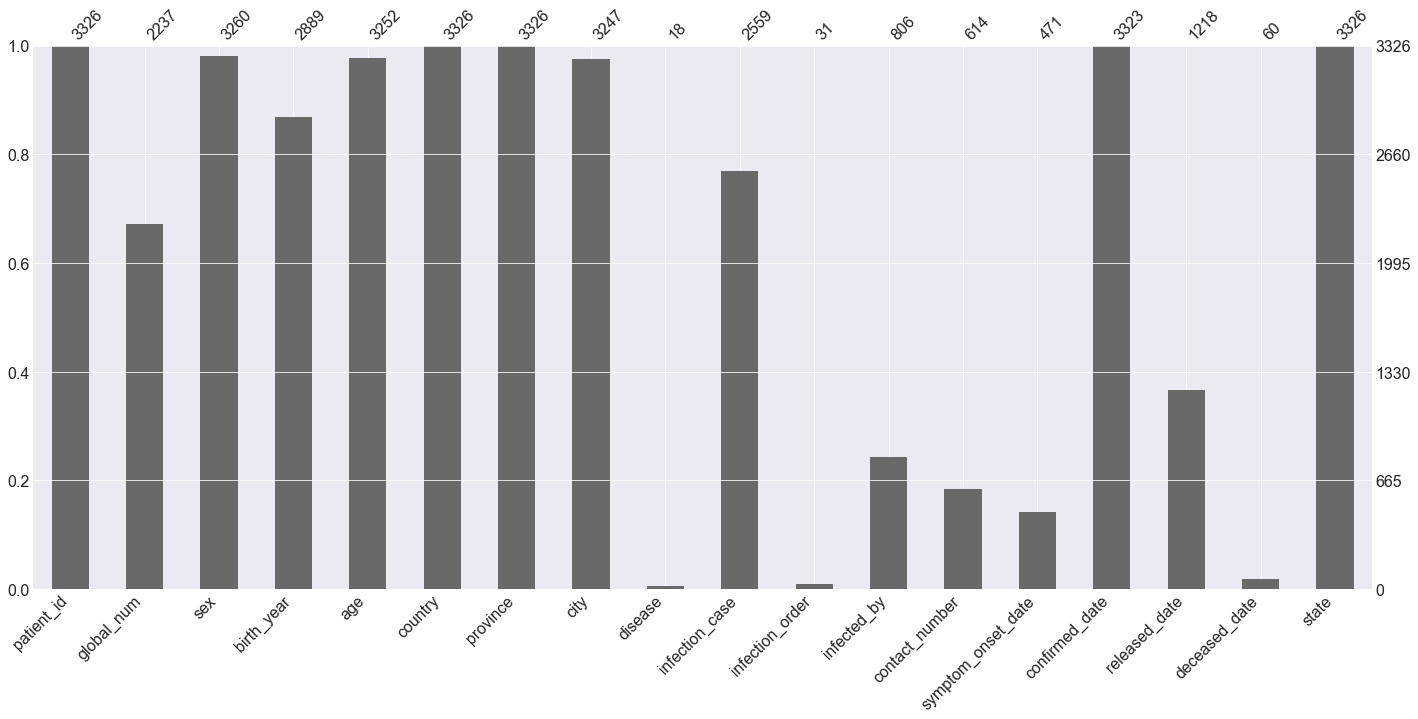

In [92]:
msno.bar(df);

- global_num ne olduğunu araştıracağım ulkeleri temsil ediyorsa ona göre atama yapacakğım ve eksiklikler belki bu şekilde tamamlanabilir.
- yaş bakılarak doğum yılları girilebilir.
- disease = çoğu kişinin hastalıgı boş bırakılmış bu bize cogu kişinin kronik hastalığı olmadığı sonucunu verebilir
- infection_case = hastalıkları nasıl kaptığı , boş değerlere bilinmiyor olarak atanabilir veya yaşadığı yer incelenip olasılıklar hesaplanıp atama yapılabilir.
- infection_order  pek anlamlı birşey değilse  silinebilir

- confirmed_date = Herkesin kaç kişi ile iletişim kurduğu girilmi bu çok güzel birşey
- confirmend_date , released_date , deceased_date aralarında ilişki vardır ve bir hasta ,iyileşir , iyileşmez , veya olur .

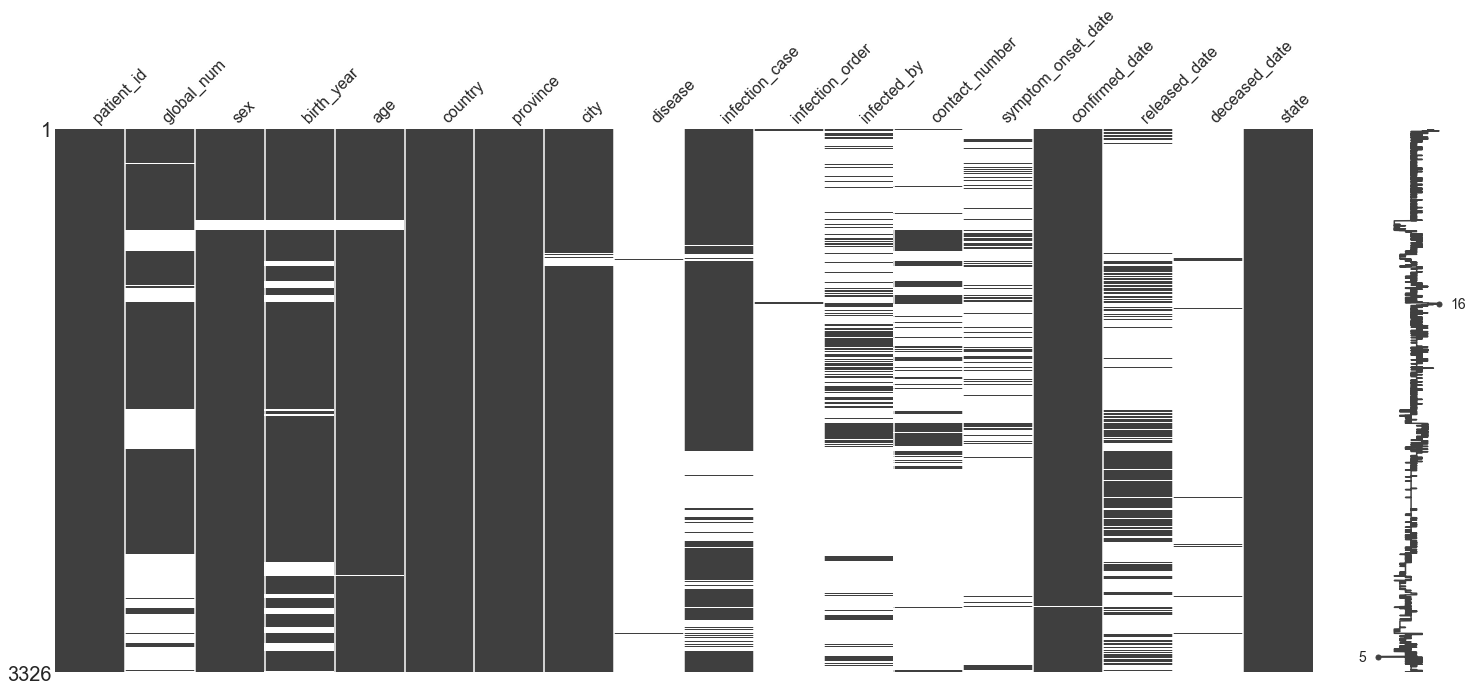

In [93]:
msno.matrix(df);

- Belli bir gurupta çok garip şekilde sex , birth_year , age değişkenleri eksik
- disease değişkeni 0 ,1 olarak değiştirilmeli
- infection_order belkide ilişkisel veri tabanından çekildiği için bişeyi temsil ediyor olabilir (baktım değil)



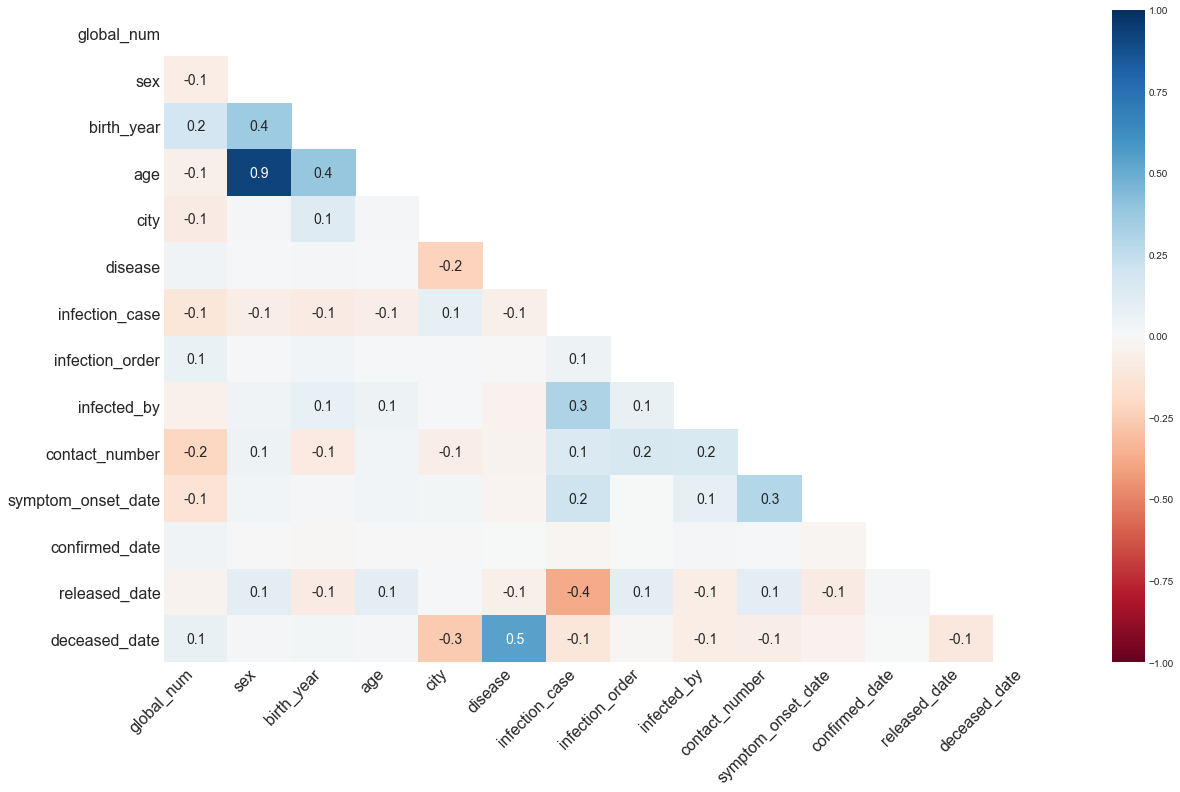

In [94]:
msno.heatmap(df)

- cinsiyet ile yaş arasında neden bu kadar yüksek korelasyon var ?
- deceased_date ile disease arasındaki ilişki hastalığı olanların arısının öldüğünü soyluyor

In [95]:
df.groupby(["sex","age"])[[ "age"]].count()

## Veri tiplerini gruplayalım ve kendi içerisindeki yapıyı inceleyelim ardından kendimize bir plan oluşturalım :

age
sex    age      
female 0s     22
       100s    1
       10s    61
       20s   418
       30s   209
       40s   279
       50s   358
       60s   222
       70s   121
       80s   105
       90s    30
male   0s     31
       10s    85
       20s   371
       30s   216
       40s   174
       50s   231
       60s   176
       70s    76
       80s    50
       90s    15

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3326 entries, 0 to 3325
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          3326 non-null   int64  
 1   global_num          2237 non-null   float64
 2   sex                 3260 non-null   object 
 3   birth_year          2889 non-null   float64
 4   age                 3252 non-null   object 
 5   country             3326 non-null   object 
 6   province            3326 non-null   object 
 7   city                3247 non-null   object 
 8   disease             18 non-null     object 
 9   infection_case      2559 non-null   object 
 10  infection_order     31 non-null     float64
 11  infected_by         806 non-null    float64
 12  contact_number      614 non-null    float64
 13  symptom_onset_date  471 non-null    object 
 14  confirmed_date      3323 non-null   object 
 15  released_date       1218 non-null   object 
 16  deceas

<a id=5></a>
## Veri setindeki tekrarlamaların incelenmesi 

###  Paient id de tekrarlama var mı ? 

In [97]:
df.patient_id.isnull().sum()

0

In [98]:
df.patient_id.unique

<bound method Series.unique of 0       1000000001
1       1000000002
2       1000000003
3       1000000004
4       1000000005
           ...    
3321    7000000009
3322    7000000010
3323    7000000011
3324    7000000012
3325    7000000013
Name: patient_id, Length: 3326, dtype: int64>

In [99]:
df.groupby("patient_id")[["patient_id"]].count()

,patient_id
patient_id,
1000000001,1
1000000002,1
1000000003,1
1000000004,1
1000000005,1
...,...
7000000009,1
7000000010,1
7000000011,1


- 3326 -3326  =  0 patient_id içerisinde tane tekrar eden değer var

###  Global_num  değişkeninde tekrarlama var ama bu ne kadar ? 

In [100]:
a = df.groupby("global_num")[["global_num"]].count()
a.index.names = ["index"]
a = a.sort_values(by = "global_num" ,ascending = False)
a[a["global_num"] > 1 ]

,global_num
index,
7103.0,2
847.0,2
10275.0,2
8062.0,2
9366.0,2
7982.0,2
8471.0,2
1753.0,2
8565.0,2


In [101]:
a[a["global_num"] > 1 ].count()

global_num    16
dtype: int64

- 16 tane tekrar eden değer varmış

<a id=6></a>
## Değişken Veri Tiplerinin analizi ve optimum tiplerin belirlenmesi :

In [102]:
df.columns 

Index(['patient_id', 'global_num', 'sex', 'birth_year', 'age', 'country',
       'province', 'city', 'disease', 'infection_case', 'infection_order',
       'infected_by', 'contact_number', 'symptom_onset_date', 'confirmed_date',
       'released_date', 'deceased_date', 'state'],
      dtype='object')

In [103]:
df.select_dtypes(include = ["int64" ] )

,patient_id
0,1000000001
1,1000000002
2,1000000003
3,1000000004
4,1000000005
...,...
3321,7000000009
3322,7000000010
3323,7000000011
3324,7000000012


In [104]:
df.select_dtypes( include = ["float64"] ).head()

,global_num,birth_year,infection_order,infected_by,contact_number
0,2.0,1964.0,1.0,NaN,75.0
1,5.0,1987.0,1.0,NaN,31.0
2,6.0,1964.0,2.0,2.002000e+09,17.0
3,7.0,1991.0,1.0,NaN,9.0
4,9.0,1992.0,2.0,1.000000e+09,2.0


In [105]:
df.select_dtypes( include = ["object"] ).head(3)

,sex,age,country,province,city,disease,infection_case,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,male,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,male,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,NaN,2020-01-30,2020-03-02,NaN,released
2,male,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,NaN,2020-01-30,2020-02-19,NaN,released


- örneğin doğum yılı gibi değişkenler int tipine cevrilebilir  
- object tipinde olan tarihler ise data tipine cevrilmeli



In [106]:
df.global_num.value_counts()
# global num ne işe yarıyor

8062.0     2
7982.0     2
10275.0    2
7103.0     2
8471.0     2
          ..
9559.0     1
6773.0     1
1370.0     1
8132.0     1
2.0        1
Name: global_num, Length: 2221, dtype: int64

In [107]:
df.isnull().sum()

patient_id               0
global_num            1089
sex                     66
birth_year             437
age                     74
country                  0
province                 0
city                    79
disease               3308
infection_case         767
infection_order       3295
infected_by           2520
contact_number        2712
symptom_onset_date    2855
confirmed_date           3
released_date         2108
deceased_date         3266
state                    0
dtype: int64

1. *Veri setindende tipinin değişmesi gereken değişkenler hangileridir, nedenleri ile açıklayınız ? 
    - global_num , birth_year , infection_order , contact_number gibi değişkenlerin float olarak tutulması gereksiz , makine öğrenmesi ve verilerin görselleştirilmesinde mantılklı bir tutum olacaktır.
    - Object tipinde olan yaş değişkeni int veri tipine dönüştürülmelidir , aksi halde makine ogrenmesi modellemede sıkıntı yaşatacaktır . 
    - Veri setinde object olarak tutuklan tarihler , data tipyle tutulmalıdır, zaman grafiği çizmemize yardımcı olacaktır
    
1. *Veri setinde hangi değişkenlerin kategorileri indirgenmelidir,  nedenleri ile açıklayınız ? 
    - infection_case değişkeni içerisinde Çok sayıda birbirleriyle aynı anlamda genelleme yapılabilecek kategori bulunmakta kategori sayısını optimize etmek çok mantıklı duruyor.
    
1. *Veri setindeki boş değerler ile ilgili hangi kararlar alınmalıdır,  nedenleri ile açıklayınız ? 
    - Cok fazla eksik değer bulunmaktadır ;
        - Age değişkeni ile birth_year değişkenindeki eksik değerleri doldurabiliriz ,
        - Tarihlere nasıl bir işlem yapılacağını araştırmam gerekiyor ???
        - Vaka Tarihini hasta id ye olan yakın tarihlere göre doldurabiliriz
        

<a id = 7 ></a>
## Tek Değişken Analizi

   * [Kategorik Değişken](#8)
   * [Sayısal Değişken](#9)

<a id=8 ></a>
### Kategorik Değişken


In [108]:
def bar_plot( df ,desx ):
    print( "*******************" + desx + "**********************")
    print( df[desx].value_counts() )
    a4_dims = (11.7 ,8.27)
    fig , ax = plt.subplots( figsize = a4_dims )
    
    
    sns.barplot(ax = ax, data = df , x = df[desx].value_counts().index  ,y= df[desx].value_counts().values  ,saturation = 1 , );
    
    plt.xticks( rotation = 60 )
    plt.show()

In [109]:
df.select_dtypes( include = ["object"] ).columns

Index(['sex', 'age', 'country', 'province', 'city', 'disease',
       'infection_case', 'symptom_onset_date', 'confirmed_date',
       'released_date', 'deceased_date', 'state'],
      dtype='object')

*******************sex**********************
female    1831
male      1429
Name: sex, dtype: int64


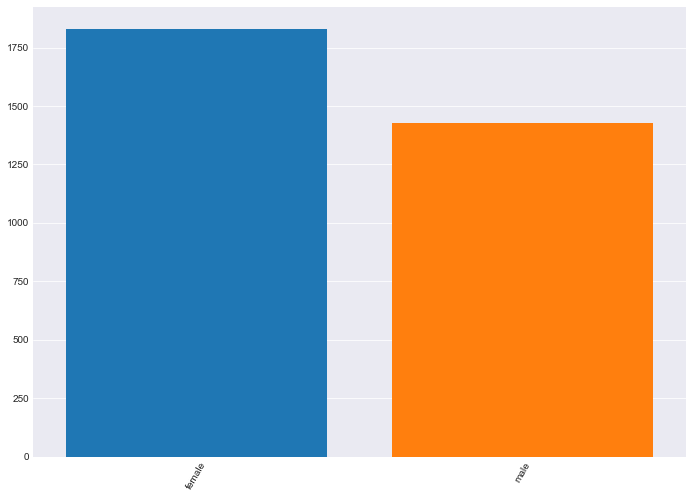

*******************age**********************
20s     790
50s     589
40s     453
30s     425
60s     398
70s     197
80s     155
10s     146
0s       53
90s      45
100s      1
Name: age, dtype: int64


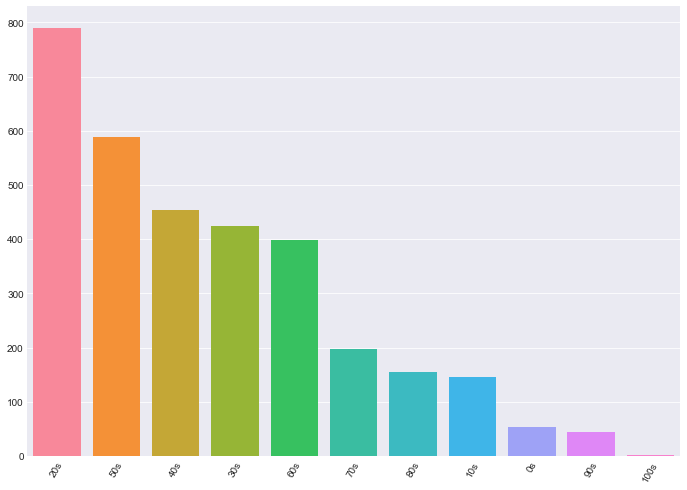

*******************country**********************
Korea            3300
China              11
United States       6
Thailand            2
Switzerland         1
Mongolia            1
Indonesia           1
France              1
Foreign             1
Canada              1
Spain               1
Name: country, dtype: int64


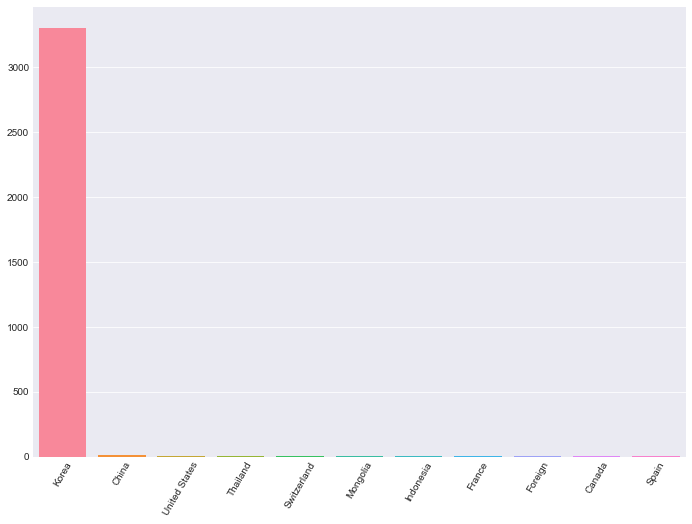

*******************province**********************
Gyeongsangbuk-do     1223
Gyeonggi-do           656
Seoul                 624
Chungcheongnam-do     141
Busan                 129
Gyeongsangnam-do      115
Incheon                92
Daegu                  63
Sejong                 46
Chungcheongbuk-do      44
Ulsan                  42
Daejeon                39
Gangwon-do             37
Gwangju                30
Jeollabuk-do           17
Jeollanam-do           15
Jeju-do                13
Name: province, dtype: int64


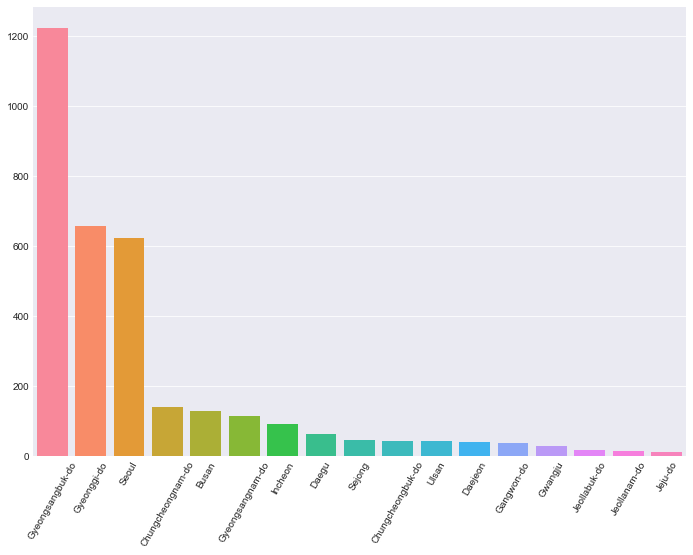

*******************city**********************
Gyeongsan-si    631
Seongnam-si     123
Cheonan-si      106
Bucheon-si       73
Bonghwa-gun      71
               ... 
Samcheok-si       1
Taean-gun         1
Hwasun-gun        1
Taebaek-si        1
Gwangyang-si      1
Name: city, Length: 151, dtype: int64


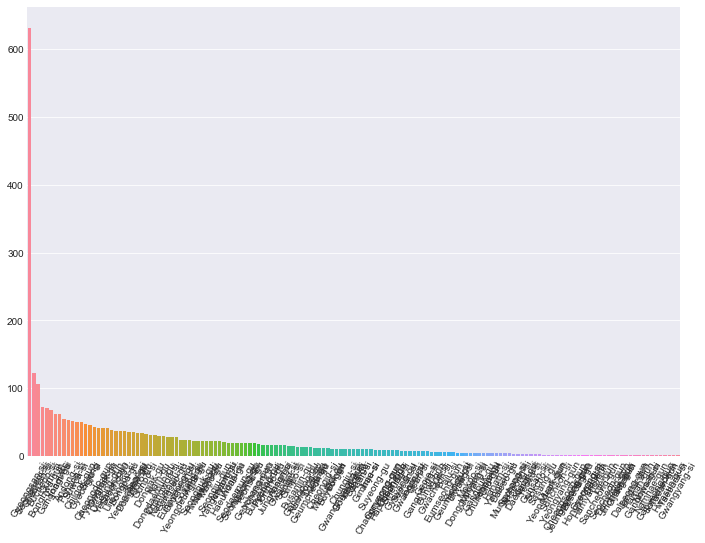

*******************disease**********************
True    18
Name: disease, dtype: int64


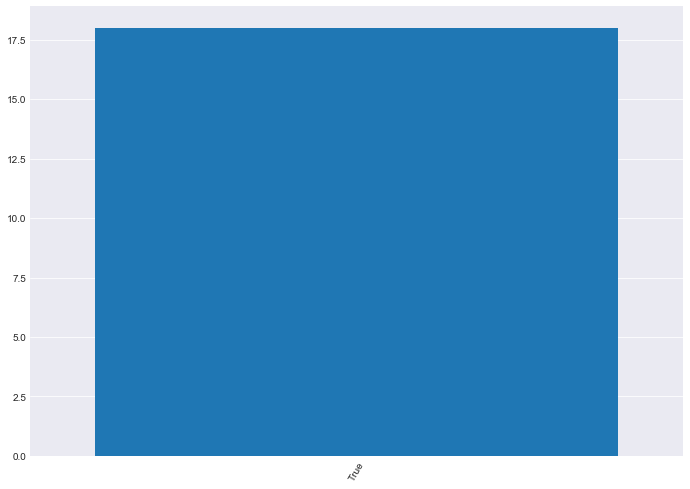

*******************infection_case**********************
contact with patient                     949
overseas inflow                          567
etc                                      567
Guro-gu Call Center                      112
Shincheonji Church                       107
Onchun Church                             33
Bonghwa Pureun Nursing Home               31
gym facility in Cheonan                   30
Ministry of Oceans and Fisheries          28
Cheongdo Daenam Hospital                  21
Dongan Church                             17
Eunpyeong St. Mary's Hospital             16
Gyeongsan Seorin Nursing Home             15
Seongdong-gu APT                          13
Gyeongsan Jeil Silver Town                12
Milal Shelter                             11
Gyeongsan Cham Joeun Community Center     10
Geochang Church                            6
Changnyeong Coin Karaoke                   4
gym facility in Sejong                     4
Suyeong-gu Kindergarten                    3

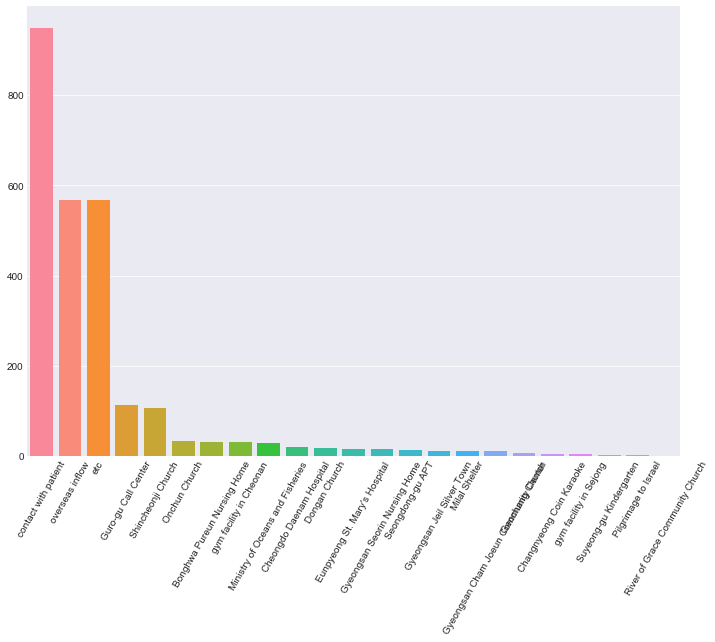

*******************symptom_onset_date**********************
2020-02-27    29
2020-02-22    21
2020-02-24    17
2020-03-28    16
2020-02-21    16
              ..
2020-04-06     1
2020-01-26     1
2020-02-04     1
2020-02-16     1
2020-01-27     1
Name: symptom_onset_date, Length: 69, dtype: int64


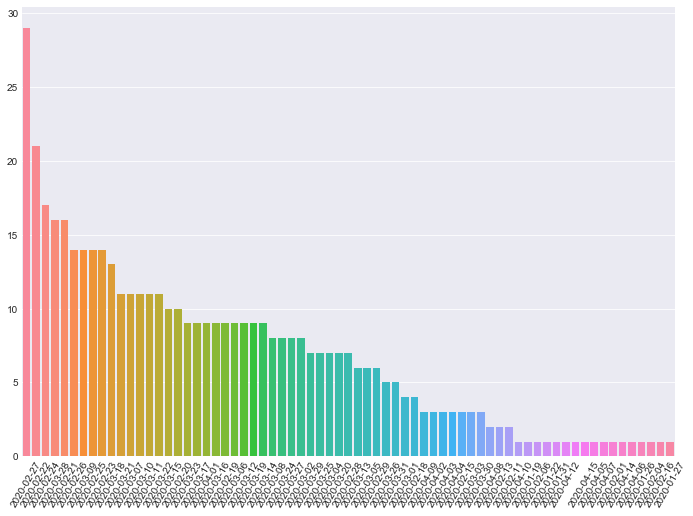

*******************confirmed_date**********************
2020-03-05    145
2020-02-28    137
2020-03-01    133
2020-02-26    124
2020-03-04    116
             ... 
2020-02-10      1
2020-01-26      1
2020-02-07      1
2020-01-27      1
2020-01-23      1
Name: confirmed_date, Length: 77, dtype: int64


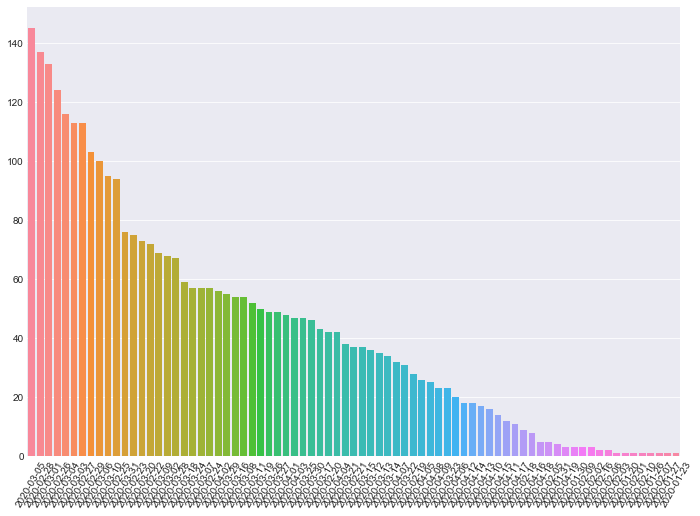

*******************released_date**********************
2020-03-20    69
2020-03-19    64
2020-03-25    57
2020-03-26    55
2020-03-23    54
              ..
2020-02-21     1
2020-02-05     1
2020-02-06     1
2020-02-17     1
2020-03-01     1
Name: released_date, Length: 66, dtype: int64


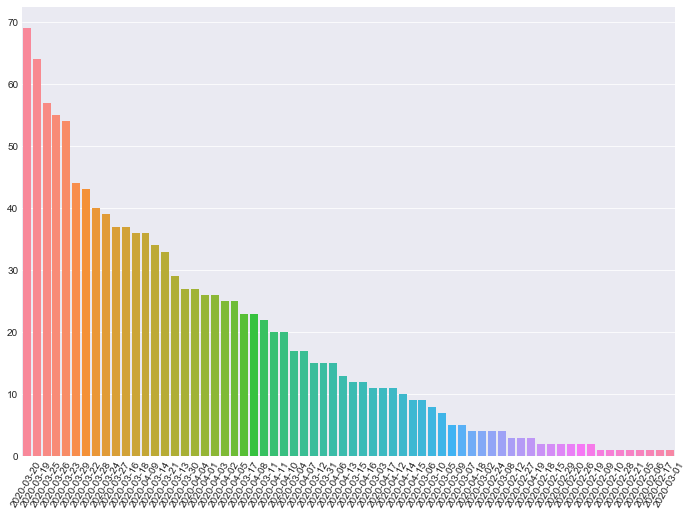

*******************deceased_date**********************
2020-03-05    4
2020-02-23    4
2020-03-02    4
2020-03-04    4
2020-03-01    3
2020-03-31    3
2020-03-09    3
2020-03-26    3
2020-03-16    3
2020-04-11    2
2020-04-03    2
2020-03-07    2
2020-02-25    2
2020-03-25    2
2020-03-22    1
2020-02-19    1
2020-03-29    1
2020-03-27    1
2020-03-20    1
2020-03-11    1
2020-02-24    1
2020-03-06    1
2020-04-02    1
2020-03-18    1
2020-03-08    1
2020-04-09    1
2020-02-21    1
2020-04-06    1
2020-04-05    1
2020-03-24    1
2020-02-26    1
2020-02-27    1
2020-03-03    1
Name: deceased_date, dtype: int64


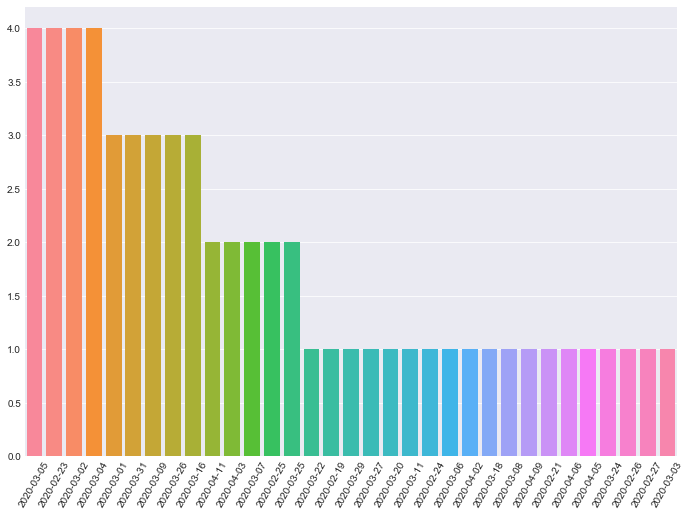

*******************state**********************
released    1637
isolated    1622
deceased      67
Name: state, dtype: int64


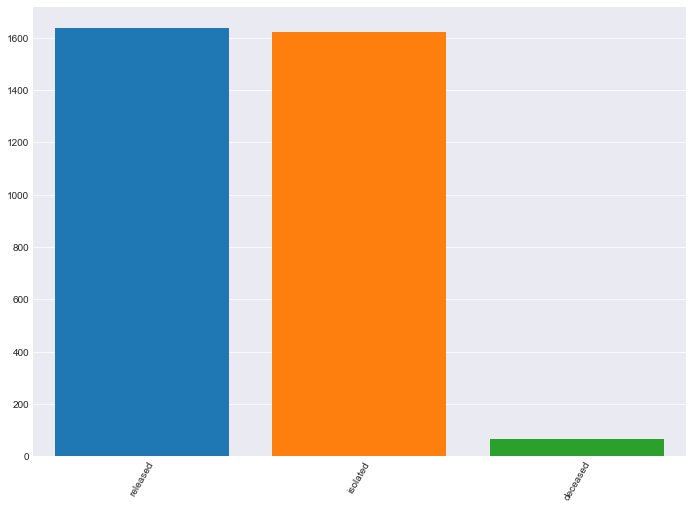

In [110]:
cat_list = ['sex', 'age', 'country', 'province', 'city', 'disease',
       'infection_case', 'symptom_onset_date', 'confirmed_date',
       'released_date', 'deceased_date', 'state']

for c in cat_list:
    bar_plot(df ,c)

- Değişkenler içerisindeki kategorilik fazla olduğu için  grafiklerin bazıları cirkin bir görüntü sunuyor
- Grafikler ve analizin daha iyi olması için  bazı değişkenlerin kategori sayıları minimuma indirilmeli mesela , infection_case değişkenindeki: içerisindeki kiliseler, spor salonları vb aynı turu temsil eden değerler bir değişken ile temsil edilmeli.

<a id=9 ></a>
### Sayısal Değişken

In [111]:
def hist_plot( df ,desx ):
    
    print("\n*****************" + desx + "******************" )
    sns.distplot( df[desx] , bins = 10, kde = False ) 
    plt.show()
    sns.kdeplot( df[desx] ,shade = True , color = "pink" )
    plt.show()

In [112]:
df.select_dtypes( include = ["int64" , "float64"] ).columns


Index(['patient_id', 'global_num', 'birth_year', 'infection_order',
       'infected_by', 'contact_number'],
      dtype='object')


*****************patient_id******************


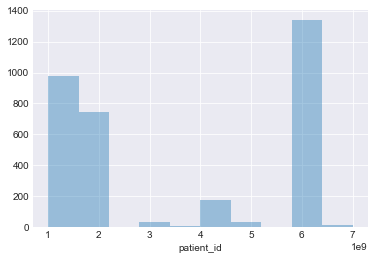

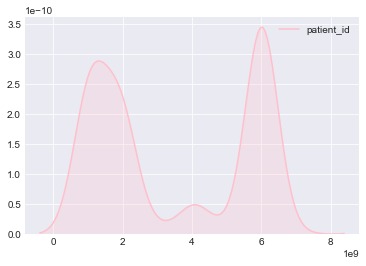


*****************global_num******************


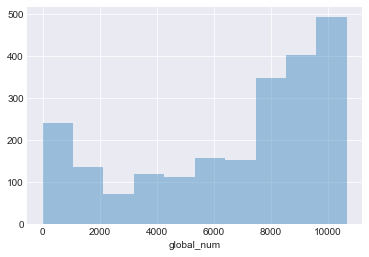

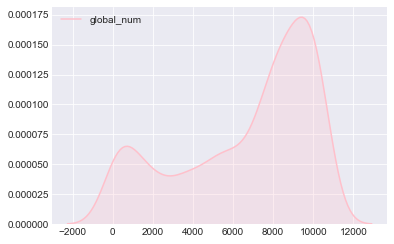


*****************birth_year******************


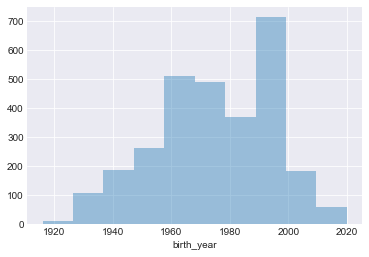

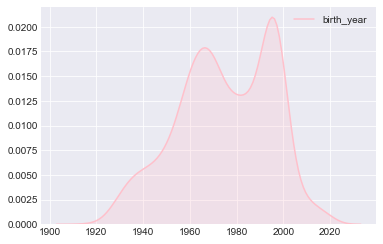


*****************infection_order******************


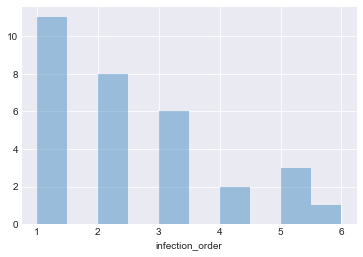

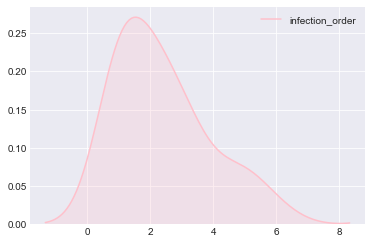


*****************infected_by******************


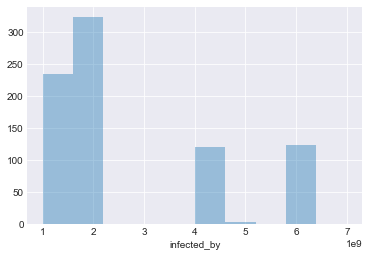

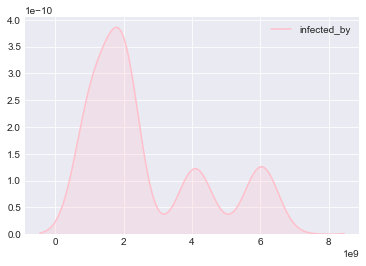


*****************contact_number******************


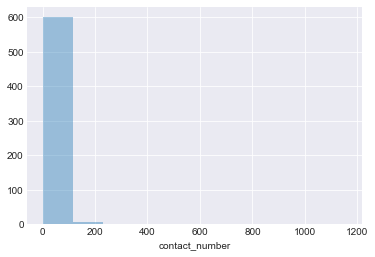

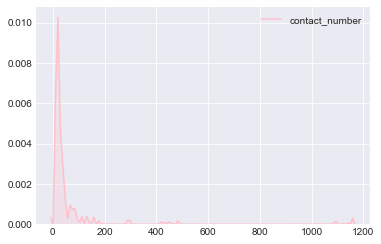

In [113]:
num_list = ['patient_id', 'global_num', 'birth_year', 'infection_order',
       'infected_by', 'contact_number']

for n in num_list:
    hist_plot(df ,n)


In [114]:
df.columns

Index(['patient_id', 'global_num', 'sex', 'birth_year', 'age', 'country',
       'province', 'city', 'disease', 'infection_case', 'infection_order',
       'infected_by', 'contact_number', 'symptom_onset_date', 'confirmed_date',
       'released_date', 'deceased_date', 'state'],
      dtype='object')

<a id=10></a>
## Veri Analizi Öncesi Değişkenleri Grafiklenebilecek Hale getirmek :

#### Age - Birth_year değişkeninin düzenlenmesi

In [115]:
dff = df.copy()
# her ihtimale karşı yedek aldık

In [116]:
df.age.dtype 
# yaş değişkeninin tipi object

dtype('O')

In [117]:
df.age.str.replace( "s" , "")


0       50
1       30
2       50
3       20
4       20
        ..
3321    20
3322    20
3323    30
3324    20
3325    10
Name: age, Length: 3326, dtype: object

In [118]:
df.age = df.age.str.replace( "s" , "")
# # yaşların sonundaki s harfini kaldırdık

In [119]:
df.age = df.age.astype( "float64" )
# yaşların data tipini float yaptın boş değer olduğunda int olmadığından dolayı

In [120]:
birth = 2020 - df.age
# doğum yılı hesaplaması yaptık

In [121]:
birth.isnull().sum()
# sonrasındaki boş değer sayısını kontrol ettik

74

In [122]:
age = 2020 - birth
# yaş hesapladık

In [123]:
age.isnull().sum()
# sonrasındaki boş değer sayısını kontrol ettik

74

In [124]:
df.age = age
# atamaları yaptık

In [125]:
df.birth_year = birth
# atamaları yaptık

In [126]:
df[df.birth_year.notnull()].head(3)
# doğrulama yaptık

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1970.0,50.0,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1990.0,30.0,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1970.0,50.0,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released


In [127]:
df[df.birth_year.isnull()].head(3)

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
563,1000000564,10313.0,NaN,NaN,NaN,Korea,Seoul,Jungnang-gu,NaN,etc,NaN,NaN,NaN,NaN,2020-04-06,NaN,NaN,released
564,1000000565,10321.0,NaN,NaN,NaN,Korea,Seoul,Seongdong-gu,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-04-06,NaN,NaN,isolated
565,1000000566,10329.0,NaN,NaN,NaN,Korea,Seoul,Gwanak-gu,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-04-06,NaN,NaN,isolated


In [128]:
df.sex.isnull().sum()
# msno matrix grafigindeki sex , age ve birth_year'ın aynı anda boş olması dikkatmi çekmişti onun kontrolümü yaptım

66

### State tip dönüşümü bazı grafik çaprazlamalarında hata vereceği için 

In [129]:
df_state = df.state.apply( lambda x :  0 if x ==  "released" else 1 if x == "isolated" else 2 )

df_state.value_counts()
# her ihtmale karşi tip dönüşümü yaptık

0    1637
1    1622
2      67
Name: state, dtype: int64

In [130]:
df_state = pd.DataFrame( data = df_state , columns= ["state"] )
# arrayımızı pandas data frame tipine çevirdik

In [131]:
df["new_state"] = df_state
# ardından df'izin uzerine yeni değişken olarak ekledik

<a id=11 ></a>
## Basit Veri Analizi
   * [Age - State](#12)
   * [Sex - State](#13)
   * [Country analizi](#14) 
   * [Province analizi](#15)
   * [Disease analizi](#16)
   * [Infection_Case - State](#17) 
   * [Symptom_onset_date - State](#18)
   * [Pairplot ](#19)
        

<a id=12></a>
#### Age - State 

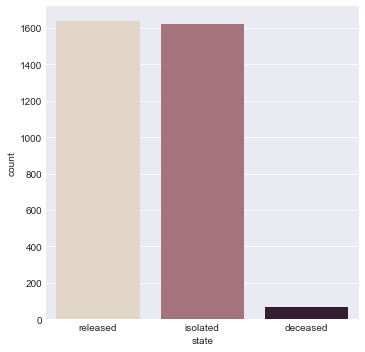

In [132]:
sns.catplot(x="state", kind="count", palette="ch:.25", data=df);

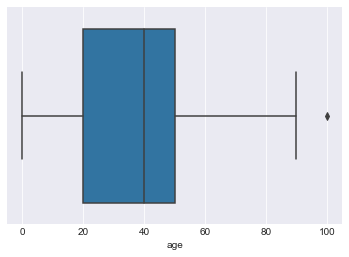

In [133]:
sns.boxplot( data = df, x = "age" );

- 100 yaşında birey vardır olabilir

In [134]:
df.state.value_counts()

released    1637
isolated    1622
deceased      67
Name: state, dtype: int64

In [135]:
df.age.value_counts()

20.0     790
50.0     589
40.0     453
30.0     425
60.0     398
70.0     197
80.0     155
10.0     146
0.0       53
90.0      45
100.0      1
Name: age, dtype: int64

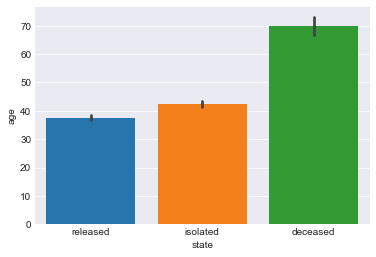

In [136]:
sns.barplot( data = df , x = "state" , y = "age"  ,saturation = .9);

- yaş ile ölüm oranı doğru orantılıdır
- 40 yaş altı iyileşme oranı yüksektir
- izole edilenlerin yaş ortalamaları 45 yaş cıvarındadır
- tabi o yaşlarda bulunan hasta sayılarınında önemi vardır

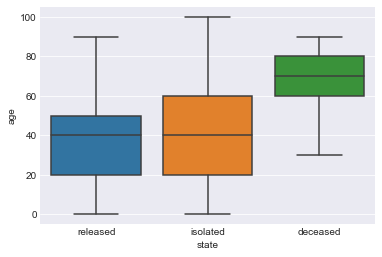

In [137]:
sns.boxplot( data = df , x = "state" , y = "age");

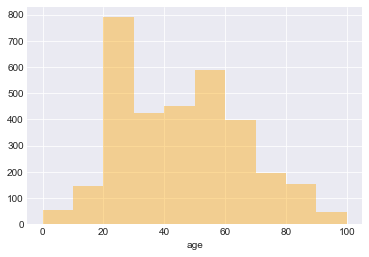

In [138]:
sns.distplot( df.age.dropna() , bins = 10  ,kde = False ,  color = "orange" );

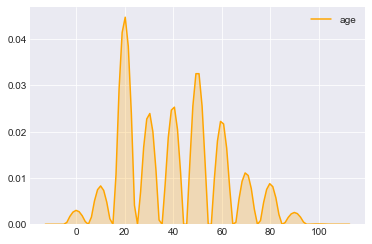

In [139]:
sns.kdeplot( df.age.dropna() ,shade = True , color = "orange", kernel = "cos");

- tam yaşların girilmediği bu grafik ile nasıl da belli oluyor 

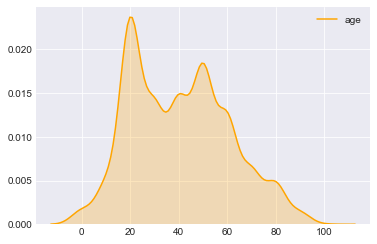

In [140]:
sns.kdeplot( df.age.dropna() ,shade = True , color = "orange");


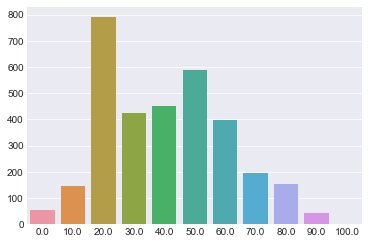

In [141]:
sns.barplot( data = df , x = df.age.value_counts().index , y = df.age.value_counts().values );

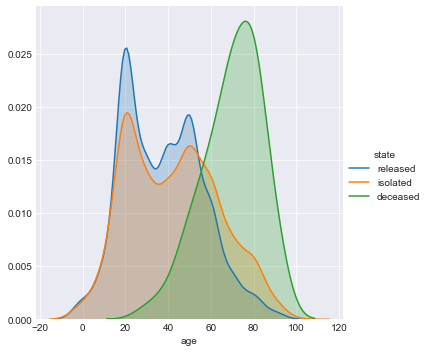

In [142]:
(sns
 .FacetGrid(
         data = df,
         hue = "state",
         height = 5
     )
.map( sns.kdeplot , "age" , shade = True )
.add_legend()
);

- Kırılımlar  ve grafikler incelendiğinde :
    * Yaş değişkenindeki 2 tepelilik o kısımlardaki kişi sayıyının fazla olmasından kaynaklanmaktadır.
    * State değişkeninde 20 yaş ve 45 yaş ortalamlarındaki kişilerde iyileşme oranı fazladır 
    * Olum yaşı 15 lere kadar düşmüştür belki hastaların kronik rahatsızlığı olabilir 
    * 15 yaş ortalmasının altında olum yoktur 
    

<a id=13></a>
#### Sex - State 

In [143]:
df.sex.value_counts()

female    1831
male      1429
Name: sex, dtype: int64

In [144]:
df.groupby(["sex" , "state"] )[["state"]].count()
# gruplatıp sayıları aldık

state
sex    state          
female deceased     23
       isolated    881
       released    927
male   deceased     44
       isolated    682
       released    703

In [145]:
df.state.value_counts().index
# sıralama hatasınına düşme bunu düzelt 

Index(['released', 'isolated', 'deceased'], dtype='object')

In [146]:
state_sira = [ 'deceased', 'isolated','released']

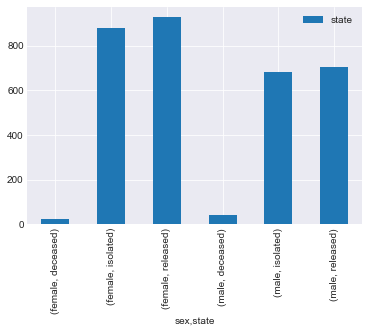

In [147]:
df.groupby(["sex" , "state"] )[["state"]].count().plot( kind = "bar" );

In [148]:
df.state.value_counts().values
# values olarak alınca toplam sayıyı veriyor bunun için grupby ile alacagız

array([1637, 1622,   67], dtype=int64)

In [149]:
gruplanmıs_sayilar = df.groupby(["state" ,"sex"])["state"].value_counts().values
# [0 ,2 ,4] female
#[1 ,3 ,5] male
gruplanmıs_sayilar

array([ 23,  44, 881, 682, 927, 703], dtype=int64)

In [150]:
female = gruplanmıs_sayilar[[0 ,2 ,4]]
male = gruplanmıs_sayilar[[1 ,3 ,5]]

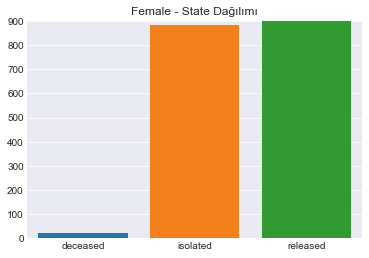

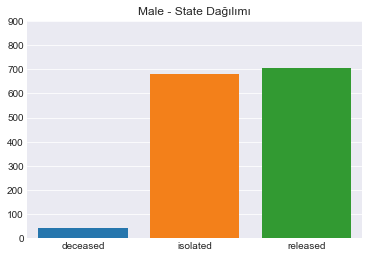

In [151]:
sns.barplot( data = df ,x =  state_sira, y = female , saturation = 0.9 )
plt.title("Female - State Dağılımı");
plt.ylim(0 ,900)
plt.show()

sns.barplot( data = df , x = state_sira ,y = male , saturation = 0.9)
plt.ylim(0 ,900)
plt.title("Male - State Dağılımı");
plt.show()

In [152]:
df.sex.value_counts()

female    1831
male      1429
Name: sex, dtype: int64

- Kadınların sayısı fazladır ancak ereklerim ölüm oranı daha yüksektir
- her iki cinsiyettede isole olan ve iyileşen sayıları kendi kendi aralarında eşit seyretmektedir

In [153]:
male

array([ 44, 682, 703], dtype=int64)

<a id=14></a>
#### Country analizi




In [154]:
df.country.value_counts()

Korea            3300
China              11
United States       6
Thailand            2
Switzerland         1
Mongolia            1
Indonesia           1
France              1
Foreign             1
Canada              1
Spain               1
Name: country, dtype: int64

In [155]:
np.array(df.groupby( ["country" ] )["state"].count())

array([   1,   11,    1,    1,    1, 3300,    1,    1,    1,    2,    6],
      dtype=int64)

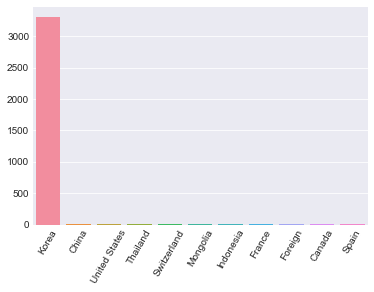

In [156]:
sns.barplot( data = df , x = df.country.value_counts().index , y = df.country.value_counts().values , saturation = 0.9 )
plt.xticks( rotation = 60 );

In [157]:
np.array(df.groupby( ["country" ] )["state"].count())

array([   1,   11,    1,    1,    1, 3300,    1,    1,    1,    2,    6],
      dtype=int64)

In [158]:
np.array(df.groupby( ["country" ] )["state"].value_counts())

array([   1,   10,    1,    1,    1,    1, 1620, 1614,   66,    1,    1,
          1,    1,    1,    3,    3], dtype=int64)

In [159]:
df.country.unique()

array(['Korea', 'China', 'United States', 'France', 'Thailand', 'Canada',
       'Switzerland', 'Indonesia', 'Foreign', 'Mongolia', 'Spain'],
      dtype=object)

In [161]:
"""(sns
.FacetGrid(data = df,
          hue = "state",
          height = 5)
 
.map(sns.barplot  , x = df.country , y = np.array(df.groupby( ["country" ] )["state"].value_counts()))
.add_legend()

)
plt.xticks( rotation = 60 )
plt.show()""

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-161-5acf964647a3>, line 11)

<a id=15></a>
#### Province analizi


In [162]:
df.province.value_counts()

Gyeongsangbuk-do     1223
Gyeonggi-do           656
Seoul                 624
Chungcheongnam-do     141
Busan                 129
Gyeongsangnam-do      115
Incheon                92
Daegu                  63
Sejong                 46
Chungcheongbuk-do      44
Ulsan                  42
Daejeon                39
Gangwon-do             37
Gwangju                30
Jeollabuk-do           17
Jeollanam-do           15
Jeju-do                13
Name: province, dtype: int64

In [163]:
df.province.unique()

array(['Seoul', 'Busan', 'Daegu', 'Gwangju', 'Incheon', 'Daejeon',
       'Ulsan', 'Sejong', 'Gyeonggi-do', 'Gangwon-do',
       'Chungcheongbuk-do', 'Chungcheongnam-do', 'Jeollabuk-do',
       'Jeollanam-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do'],
      dtype=object)

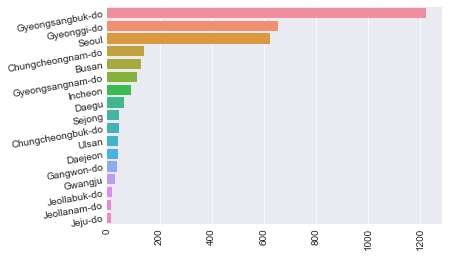

In [164]:
sns.barplot( data = df , x = df.province.value_counts().values, y = df.province.value_counts().index , saturation = 0.9)
plt.xticks(rotation = 90)
plt.yticks( rotation = 10 );


<a id=16></a>
#### Disease - State

In [165]:
df.disease.value_counts()

True    18
Name: disease, dtype: int64

In [166]:
df.disease.unique()

array([nan, True], dtype=object)

In [167]:
df.disease.apply( lambda x : 1 if  x == True   else 0)
# nan değerler 0'ı ifade etmek için 0 ,1 dönüşümu yaptık 

0       0
1       0
2       0
3       0
4       0
       ..
3321    0
3322    0
3323    0
3324    0
3325    0
Name: disease, Length: 3326, dtype: int64

In [168]:
df.disease =  df.disease.apply( lambda x : 1 if  x == True   else 0)

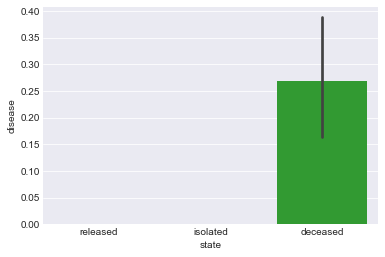

In [169]:
sns.barplot( data = df , x = "state" , y = "disease" , saturation = 0.9 );

- Hastalıklı kişilerin ölüm oranı diğer kişilerden yüksektir 

<a id=17></a>
#### Infection_Case Analizi

In [170]:
df.infection_case.value_counts()

contact with patient                     949
overseas inflow                          567
etc                                      567
Guro-gu Call Center                      112
Shincheonji Church                       107
Onchun Church                             33
Bonghwa Pureun Nursing Home               31
gym facility in Cheonan                   30
Ministry of Oceans and Fisheries          28
Cheongdo Daenam Hospital                  21
Dongan Church                             17
Eunpyeong St. Mary's Hospital             16
Gyeongsan Seorin Nursing Home             15
Seongdong-gu APT                          13
Gyeongsan Jeil Silver Town                12
Milal Shelter                             11
Gyeongsan Cham Joeun Community Center     10
Geochang Church                            6
Changnyeong Coin Karaoke                   4
gym facility in Sejong                     4
Suyeong-gu Kindergarten                    3
Pilgrimage to Israel                       2
River of G

In [171]:
df.infection_case.unique()

array(['overseas inflow', 'contact with patient', 'Seongdong-gu APT',
       'etc', "Eunpyeong St. Mary's Hospital", 'Shincheonji Church',
       'Dongan Church', 'Guro-gu Call Center', 'Onchun Church',
       'Cheongdo Daenam Hospital', 'Suyeong-gu Kindergarten', nan,
       'Ministry of Oceans and Fisheries', 'gym facility in Cheonan',
       'gym facility in Sejong', 'River of Grace Community Church',
       'Gyeongsan Seorin Nursing Home',
       'Gyeongsan Cham Joeun Community Center',
       'Gyeongsan Jeil Silver Town', 'Bonghwa Pureun Nursing Home',
       'Pilgrimage to Israel', 'Milal Shelter', 'Geochang Church',
       'Changnyeong Coin Karaoke'], dtype=object)

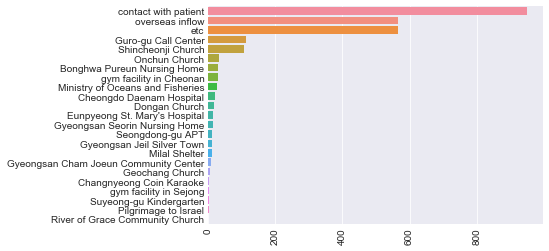

In [172]:
sns.barplot( data = df , x = df.infection_case.value_counts().values, y = df.infection_case.value_counts().index  , saturation = 0.9)
plt.xticks(rotation = 90);

<a id=18></a>
#### Symptom_onset_date zaman grafiği

In [173]:
df.columns

Index(['patient_id', 'global_num', 'sex', 'birth_year', 'age', 'country',
       'province', 'city', 'disease', 'infection_case', 'infection_order',
       'infected_by', 'contact_number', 'symptom_onset_date', 'confirmed_date',
       'released_date', 'deceased_date', 'state', 'new_state'],
      dtype='object')

In [174]:
df.symptom_onset_date.value_counts()

2020-02-27    29
2020-02-22    21
2020-02-24    17
2020-03-28    16
2020-02-21    16
              ..
2020-04-06     1
2020-01-26     1
2020-02-04     1
2020-02-16     1
2020-01-27     1
Name: symptom_onset_date, Length: 69, dtype: int64

In [175]:
df[df.symptom_onset_date.isnull()]["symptom_onset_date"]

1       NaN
2       NaN
4       NaN
5       NaN
6       NaN
       ... 
3321    NaN
3322    NaN
3323    NaN
3324    NaN
3325    NaN
Name: symptom_onset_date, Length: 2855, dtype: object

In [176]:
df.symptom_onset_date.count()


471

In [177]:
df.shape

(3326, 19)

In [178]:
3326 - 2855

471

In [179]:
df.symptom_onset_date.value_counts()

2020-02-27    29
2020-02-22    21
2020-02-24    17
2020-03-28    16
2020-02-21    16
              ..
2020-04-06     1
2020-01-26     1
2020-02-04     1
2020-02-16     1
2020-01-27     1
Name: symptom_onset_date, Length: 69, dtype: int64

In [180]:
df_data2 = df.symptom_onset_date.value_counts()

In [181]:
df_data2[:3]

2020-02-27    29
2020-02-22    21
2020-02-24    17
Name: symptom_onset_date, dtype: int64

In [182]:
df_data2.index

Index(['2020-02-27', '2020-02-22', '2020-02-24', '2020-03-28', '2020-02-21',
       '2020-02-26', '2020-03-09', '2020-02-25', '2020-02-23', '2020-03-18',
       '2020-03-21', '2020-03-07', '2020-03-10', '2020-03-11', '2020-03-22',
       '2020-03-15', '2020-02-20', '2020-03-23', '2020-03-17', '2020-04-01',
       '2020-03-16', '2020-02-19', '2020-03-06', '2020-03-12', '2020-03-19',
       '2020-03-14', '2020-03-08', '2020-03-24', '2020-03-27', '2020-03-02',
       '2020-03-29', '2020-03-25', '2020-03-04', '2020-03-20', '2020-02-28',
       '2020-03-13', '2020-03-05', '2020-02-29', '2020-03-26', '2020-03-31',
       '2020-03-01', '2020-02-18', '2020-04-09', '2020-04-02', '2020-04-03',
       '2020-04-04', '2020-02-15', '2020-03-03', '2020-03-30', '2020-04-08',
       '2020-02-13', '2020-02-11', '2020-04-10', '2020-01-19', '2020-02-06',
       '2020-01-22', '2020-01-31', '2020-04-12', ' ', '2020-04-15',
       '2020-04-05', '2020-04-07', '2020-02-01', '2020-04-14', '2020-04-06',
       '

In [183]:
# df_data2.index = pd.DatetimeIndex( df_data2.index )

- Boş değerler olduğu için dönüştürme yapamadı boş değerler doldurulduktal sonra dönüştürme yapılabilir


In [184]:
df_data2

2020-02-27    29
2020-02-22    21
2020-02-24    17
2020-03-28    16
2020-02-21    16
              ..
2020-04-06     1
2020-01-26     1
2020-02-04     1
2020-02-16     1
2020-01-27     1
Name: symptom_onset_date, Length: 69, dtype: int64

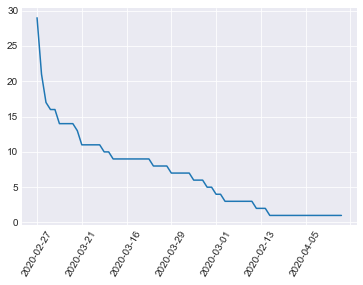

In [185]:
df_data2.plot()
plt.xticks( rotation = 60);


- zaman ilerledikçe onaylanan vakalarda azalış söz konusudur

<a id=19></a>
#### Pairplot

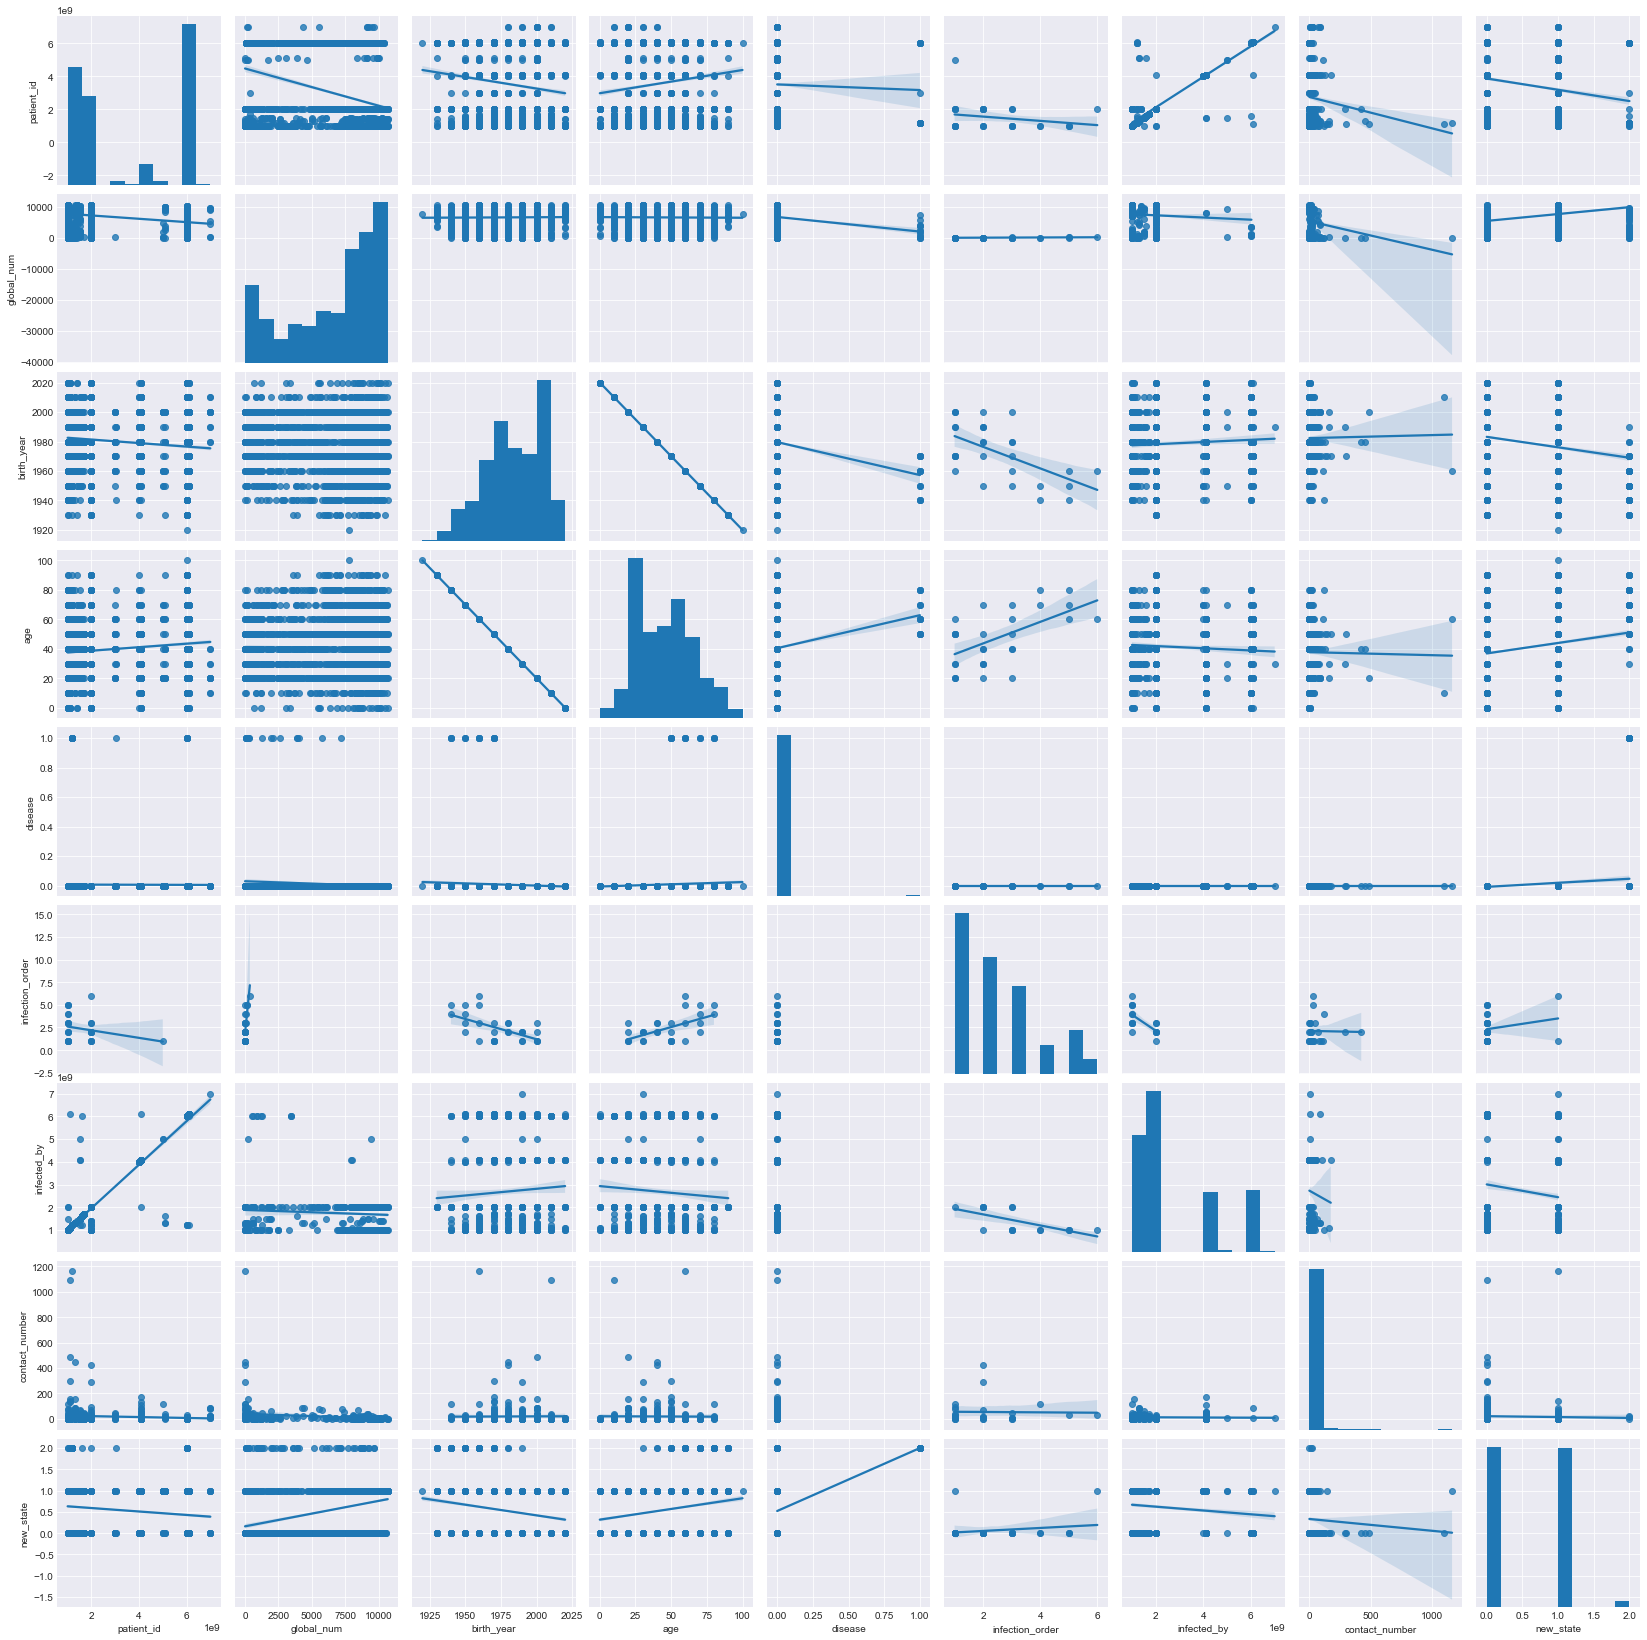

In [186]:
sns.pairplot(df ,kind= "reg")

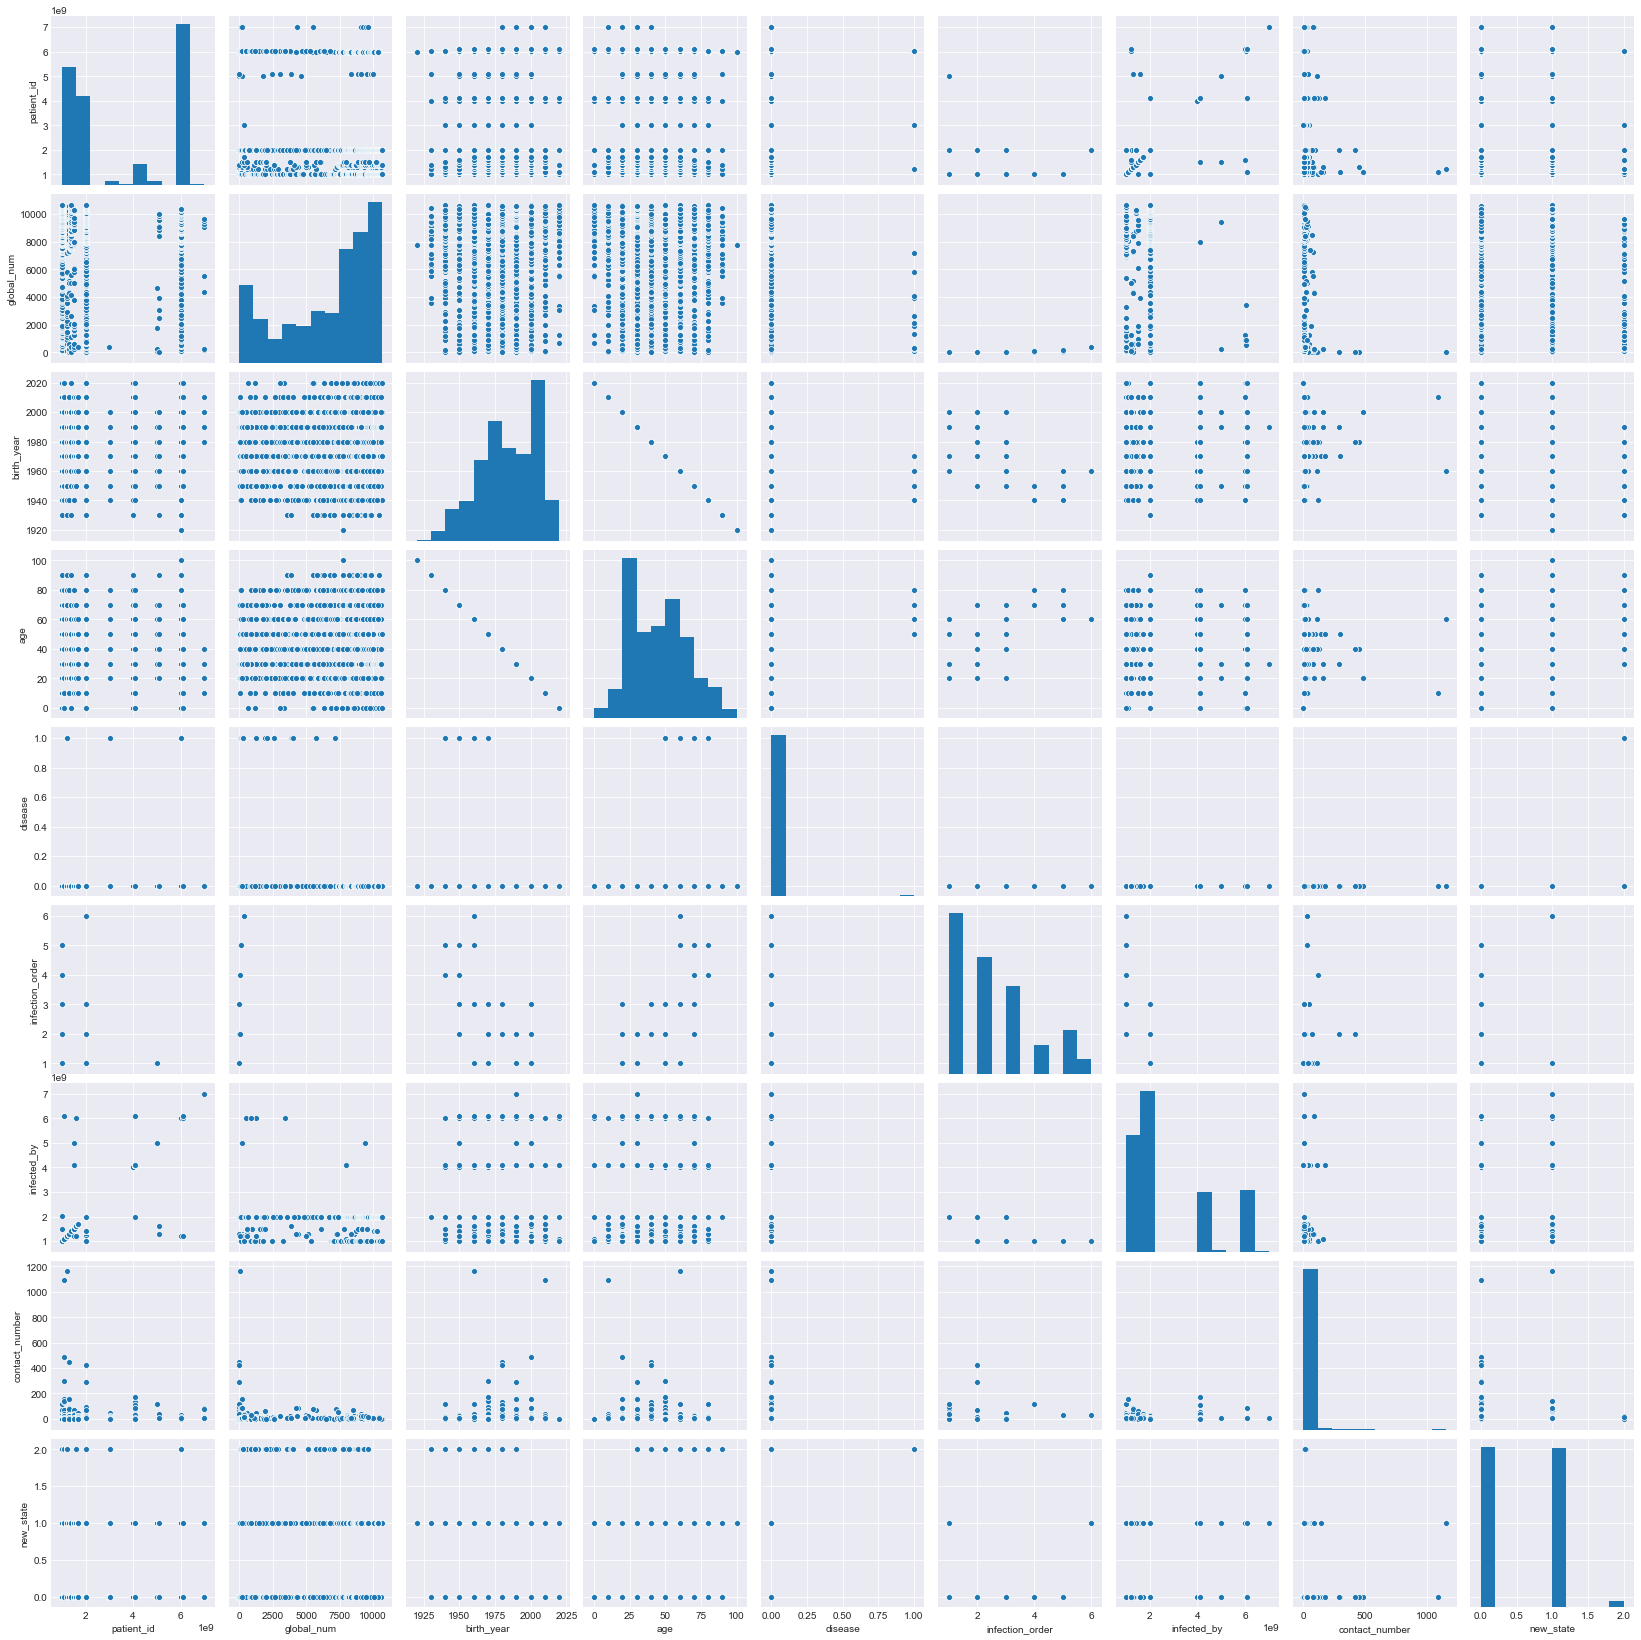

In [187]:
sns.pairplot( df );

<a id=20></a>
# Veride düzenlemeler 

In [188]:
df.head(3)

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,new_state
0,1000000001,2.0,male,1970.0,50.0,Korea,Seoul,Gangseo-gu,0,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released,0
1,1000000002,5.0,male,1990.0,30.0,Korea,Seoul,Jungnang-gu,0,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released,0
2,1000000003,6.0,male,1970.0,50.0,Korea,Seoul,Jongno-gu,0,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released,0


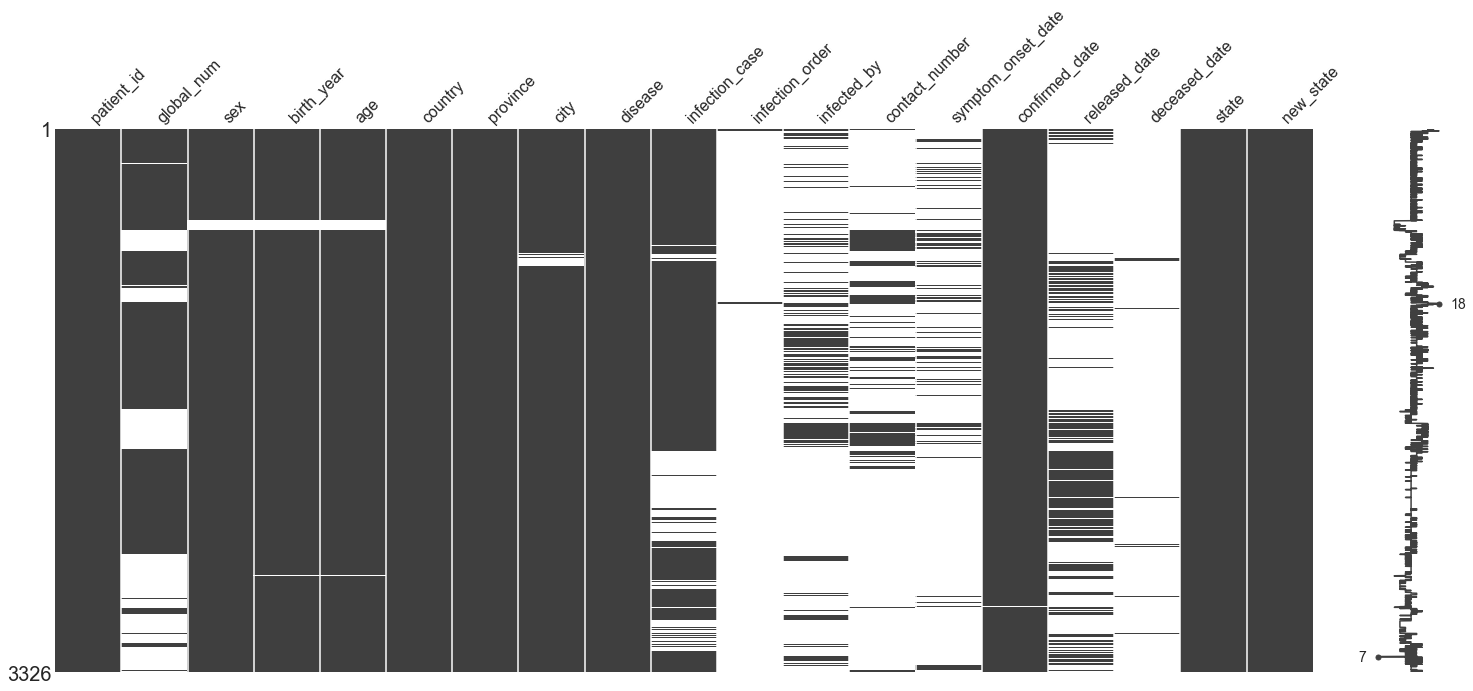

In [189]:
msno.matrix(df);

In [190]:
df.isnull().sum()

patient_id               0
global_num            1089
sex                     66
birth_year              74
age                     74
country                  0
province                 0
city                    79
disease                  0
infection_case         767
infection_order       3295
infected_by           2520
contact_number        2712
symptom_onset_date    2855
confirmed_date           3
released_date         2108
deceased_date         3266
state                    0
new_state                0
dtype: int64

- id değişkenimizde boş değer yoktur ,
- global_num değişkenimizde cok fazla boş değer vardır (bu değişken Region.csv ile bağlantılı şimdilik bu değişkeni veri setinden çıkaracağız)
- ilerliyen zamanda makine oğrenmesi için cinsiyet değişkenini düzenliyeceğiz
- infection_order(enkeksiyon sırası) değikeni silinecek
- infected_by değşikeni önemli değişken hastalığı kimden aldığının bilgisini taşıyor bundan dolayı bu değişken silinmeyecek ve boş gözlemlere 0 değeri atanacak makine öğrenmesi için . aslında gittiği yerlerden göre tahmin edilebilir ama mantıksıza kaçar
- symptom_onset_date değişkeni boş olanlara confirmed_date değişkeni atanabilir en mantıklısı bu 
- conctact_number'ı boş olan değerler ya iletişim kurduğu kişi sayısını bilmiyor biz her der değeri 1 arttıracağız ve bilinmeyen değerleri 0 yapacağız 
- infection_case değişkenine bilinmiyor kategorisi ekleyip boş gözlemleri dolduracağız veya etc kategorisi olarak atıyacağız hatta ikametgah ettiği yere göre atama yapılabilir (mesela yaşlı ve bellirli şehirdeki huzur evinden gelmisse oradan kapmış olabilir)
- doğum tarihi değişkeni silinmeli 

### Birth_year  değişkenini silelim 

In [191]:
df.drop("birth_year",axis= 1 ,inplace = True)

### infection_case 'deki boş değerlere Unknown atama

In [192]:
df.infection_case.value_counts()

contact with patient                     949
overseas inflow                          567
etc                                      567
Guro-gu Call Center                      112
Shincheonji Church                       107
Onchun Church                             33
Bonghwa Pureun Nursing Home               31
gym facility in Cheonan                   30
Ministry of Oceans and Fisheries          28
Cheongdo Daenam Hospital                  21
Dongan Church                             17
Eunpyeong St. Mary's Hospital             16
Gyeongsan Seorin Nursing Home             15
Seongdong-gu APT                          13
Gyeongsan Jeil Silver Town                12
Milal Shelter                             11
Gyeongsan Cham Joeun Community Center     10
Geochang Church                            6
Changnyeong Coin Karaoke                   4
gym facility in Sejong                     4
Suyeong-gu Kindergarten                    3
Pilgrimage to Israel                       2
River of G

In [193]:
df.infection_case.fillna("Unknown" ,inplace = True)

In [194]:
df.isnull().sum()

patient_id               0
global_num            1089
sex                     66
age                     74
country                  0
province                 0
city                    79
disease                  0
infection_case           0
infection_order       3295
infected_by           2520
contact_number        2712
symptom_onset_date    2855
confirmed_date           3
released_date         2108
deceased_date         3266
state                    0
new_state                0
dtype: int64

### symptom_onset_date 'da bulunan boşlukları confirmed_date ile doldurmak

In [195]:
df["symptom_onset_date"].fillna(df["confirmed_date"]).isnull().sum()

2

In [196]:
df["symptom_onset_date"] =  df["symptom_onset_date"].fillna(df["confirmed_date"])

### confirmed_date 'da bulunan boşlukları symptom_onset_date ile doldurma ve artıkları silme

In [197]:
df[df.confirmed_date.isnull()]

,patient_id,global_num,sex,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,new_state
2923,6011000051,NaN,female,40.0,Korea,Gyeongsangbuk-do,Andong-si,0,etc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,isolated,1
2924,6011000052,NaN,female,0.0,Korea,Gyeongsangbuk-do,Andong-si,0,etc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,isolated,1
2925,6011000053,NaN,female,10.0,Korea,Gyeongsangbuk-do,Andong-si,0,etc,NaN,NaN,NaN,2020-04-15,NaN,NaN,NaN,isolated,1


In [198]:
df.confirmed_date.fillna( df.symptom_onset_date ,inplace = True )

In [199]:
df[((df.confirmed_date.isnull()) & (df.symptom_onset_date.isnull()))].index

Int64Index([2923, 2924], dtype='int64')

In [200]:
df.drop(index = df[((df.confirmed_date.isnull()) & (df.symptom_onset_date.isnull()))].index ,inplace = True)

In [201]:
df.isnull().sum()

patient_id               0
global_num            1087
sex                     66
age                     74
country                  0
province                 0
city                    79
disease                  0
infection_case           0
infection_order       3293
infected_by           2518
contact_number        2710
symptom_onset_date       0
confirmed_date           0
released_date         2106
deceased_date         3264
state                    0
new_state                0
dtype: int64

### contact_number ' ı düzenleyip nan değerlere atama yapmak 

In [202]:
df.contact_number = df.contact_number + 1

In [203]:
df[ df["contact_number"]== 0]

,patient_id,global_num,sex,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,new_state


In [204]:
df.contact_number.fillna(0 , inplace = True)

### city değişkenindeki boş değişkenleri bilinmiyor ile değiştirme

In [205]:
df.city.fillna("Unknown" , inplace = True)

### Silinmesini kararlaştırdığımız değerleri silmek 

In [206]:
df.isnull().sum()

patient_id               0
global_num            1087
sex                     66
age                     74
country                  0
province                 0
city                     0
disease                  0
infection_case           0
infection_order       3293
infected_by           2518
contact_number           0
symptom_onset_date       0
confirmed_date           0
released_date         2106
deceased_date         3264
state                    0
new_state                0
dtype: int64

In [207]:
df.drop( "global_num" , axis = 1 ,inplace =  True)

In [208]:
df.drop( "infected_by" ,axis = 1  ,inplace = True)

In [209]:
df.drop( "infection_order" ,axis = 1  ,inplace = True)


In [210]:
df

,patient_id,sex,age,country,province,city,disease,infection_case,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,new_state
0,1000000001,male,50.0,Korea,Seoul,Gangseo-gu,0,overseas inflow,76.0,2020-01-22,2020-01-23,2020-02-05,NaN,released,0
1,1000000002,male,30.0,Korea,Seoul,Jungnang-gu,0,overseas inflow,32.0,2020-01-30,2020-01-30,2020-03-02,NaN,released,0
2,1000000003,male,50.0,Korea,Seoul,Jongno-gu,0,contact with patient,18.0,2020-01-30,2020-01-30,2020-02-19,NaN,released,0
3,1000000004,male,20.0,Korea,Seoul,Mapo-gu,0,overseas inflow,10.0,2020-01-26,2020-01-30,2020-02-15,NaN,released,0
4,1000000005,female,20.0,Korea,Seoul,Seongbuk-gu,0,contact with patient,3.0,2020-01-31,2020-01-31,2020-02-24,NaN,released,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3321,7000000009,female,20.0,Korea,Jeju-do,Jeju-do,0,overseas inflow,15.0,2020-03-29,2020-03-29,NaN,NaN,isolated,1
3322,7000000010,female,20.0,Korea,Jeju-do,Jeju-do,0,overseas inflow,19.0,2020-04-03,2020-04-03,NaN,NaN,isolated,1
3323,7000000011,male,30.0,Korea,Jeju-do,Jeju-do,0,contact with patient,6.0,2020-04-03,2020-04-03,NaN,NaN,isolated,1
3324,7000000012,female,20.0,Korea,Jeju-do,Jeju-do,0,overseas inflow,10.0,2020-04-03,2020-04-03,NaN,NaN,isolated,1


### Aykırı gözlem silme 

In [211]:



def delete_outlier( df , df_cols ):
    outlier_indices = list()
    
    
    for c in df_cols:
        
        Q1 = np.percentile( df[c] ,25)
        Q3 = np.pencentile( df[c] ,75)
        
        IQR = Q3 - Q1
        
        outlier_step = IQR * 1.5
        
        ouutlier_list_col = df[ (df[c] < Q1 - outlier_step ) | (df[c] > Q3 + outlier_step) ]
        
        outlier_indices.extend( outlier_list_col )
        
    outlier_indices = Counter( outlier_indices )
    multiple_outliers = list( i for i ,v in outlier_indices.items()  if v > 2 )
    
    return multiple_outliers
    

- Bu veri seti için kullanmıyacağız ama bi köşede dursun

<a id=21></a>
##  Boş Gözlemler

   * [Boş gözlemleri Bulma](#22)
   * [Boş gözlemleri Doldurma](#23)

<a id =22></a>
### Boş gözlem bulma 

In [212]:
df.columns[ df.isnull().any() ]

Index(['sex', 'age', 'released_date', 'deceased_date'], dtype='object')

In [213]:
df.isnull().sum()

patient_id               0
sex                     66
age                     74
country                  0
province                 0
city                     0
disease                  0
infection_case           0
contact_number           0
symptom_onset_date       0
confirmed_date           0
released_date         2106
deceased_date         3264
state                    0
new_state                0
dtype: int64

In [214]:
df[df.isnull()]

,patient_id,sex,age,country,province,city,disease,infection_case,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,new_state
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


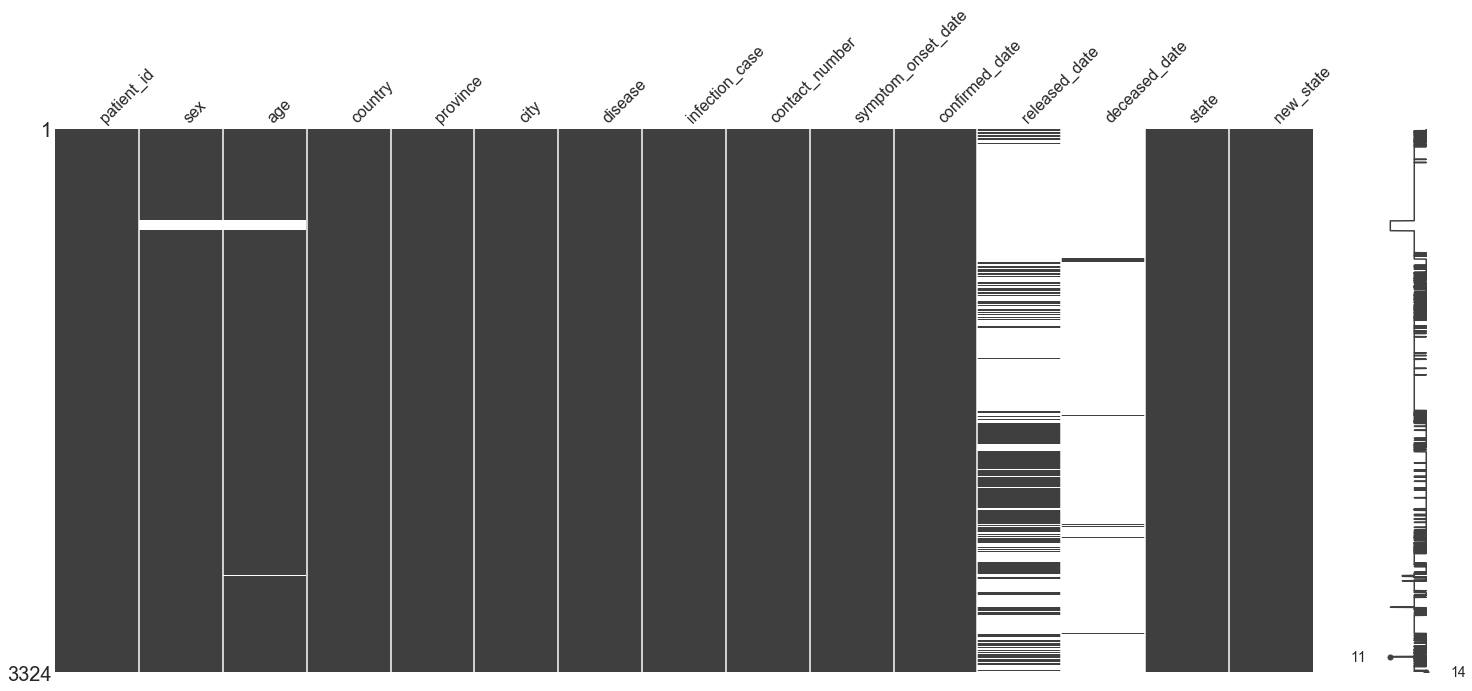

In [215]:
msno.matrix(df)

In [216]:
df[df.age.isnull()]

,patient_id,sex,age,country,province,city,disease,infection_case,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,new_state
563,1000000564,NaN,NaN,Korea,Seoul,Jungnang-gu,0,etc,0.0,2020-04-06,2020-04-06,NaN,NaN,released,0
564,1000000565,NaN,NaN,Korea,Seoul,Seongdong-gu,0,overseas inflow,0.0,2020-04-06,2020-04-06,NaN,NaN,isolated,1
565,1000000566,NaN,NaN,Korea,Seoul,Gwanak-gu,0,overseas inflow,0.0,2020-04-06,2020-04-06,NaN,NaN,isolated,1
566,1000000567,NaN,NaN,Korea,Seoul,Gangnam-gu,0,overseas inflow,0.0,2020-04-06,2020-04-06,NaN,NaN,isolated,1
567,1000000568,NaN,NaN,Korea,Seoul,Nowon-gu,0,overseas inflow,0.0,2020-04-06,2020-04-06,NaN,NaN,isolated,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,6012000001,female,NaN,Korea,Gyeongsangbuk-do,Yeongdeok-gun,0,etc,1.0,2020-02-29,2020-02-29,NaN,NaN,released,0
2927,6012000002,NaN,NaN,Korea,Gyeongsangbuk-do,Yeongdeok-gun,0,etc,1.0,2020-02-29,2020-02-29,NaN,NaN,released,0
3228,6100000031,NaN,NaN,Korea,Gyeongsangnam-do,Unknown,0,Unknown,0.0,2020-02-26,2020-02-26,NaN,NaN,isolated,1
3229,6100000032,NaN,NaN,Korea,Gyeongsangnam-do,Unknown,0,Unknown,0.0,2020-02-26,2020-02-26,NaN,NaN,isolated,1


### Country ile age tahmin edilir mi ? 

In [217]:
df[df.country == "Thailand" ]

,patient_id,sex,age,country,province,city,disease,infection_case,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,new_state
378,1000000379,male,30.0,Thailand,Seoul,Seodaemun-gu,0,overseas inflow,0.0,2020-03-27,2020-03-27,NaN,NaN,isolated,1
2753,6006000017,female,20.0,Thailand,Gyeongsangbuk-do,Gimcheon-si,0,contact with patient,0.0,2020-03-05,2020-03-05,2020-04-06,NaN,released,0


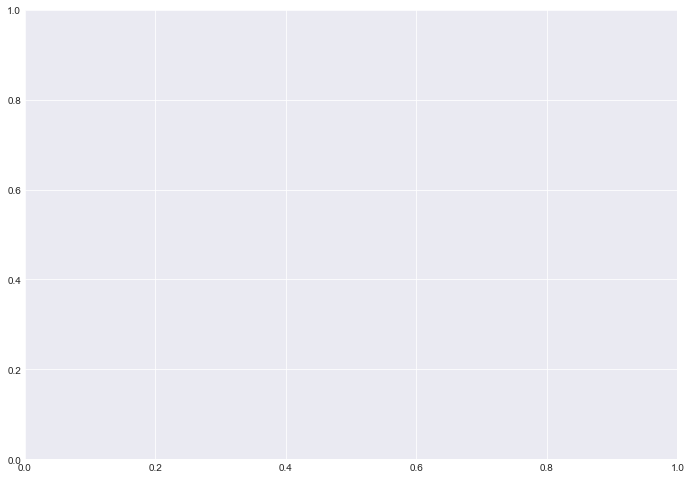

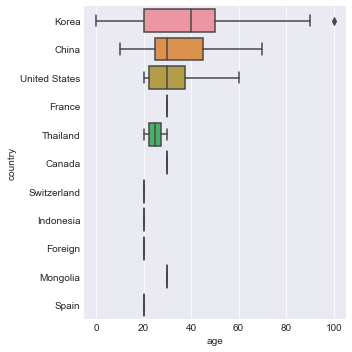

In [218]:
a4_dims = (11.7 ,8.27)
fig , ax = plt.subplots( figsize = a4_dims )
sns.factorplot(ax = ax , data = df, x ="age",y = "country" ,kind = "box" );

- country değişkenine bakarak atma yapmak pek mantıklı durmuyor 

### Province ile Age Tahmin edilir mi ? 

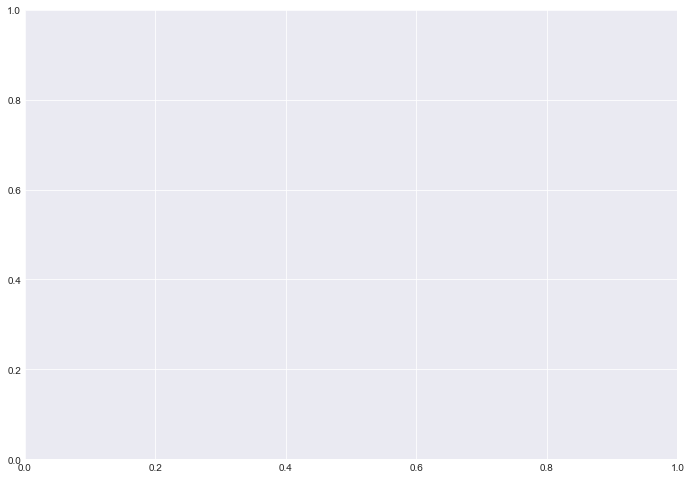

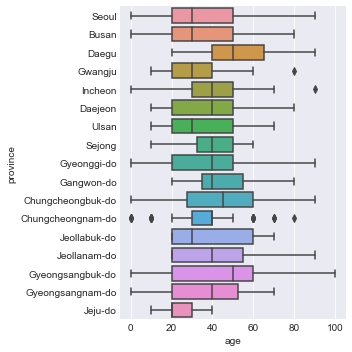

In [219]:
a4_dims = (11.7 ,8.27)
fig , ax = plt.subplots( figsize = a4_dims )
sns.factorplot( ax = ax , data = df ,x = "age" , y = "province" , kind = "box" );

- diğer değşkenler ile caprazlanarak tahminde bulunulabilir .

### City ile age tahmin edilir mi ? 

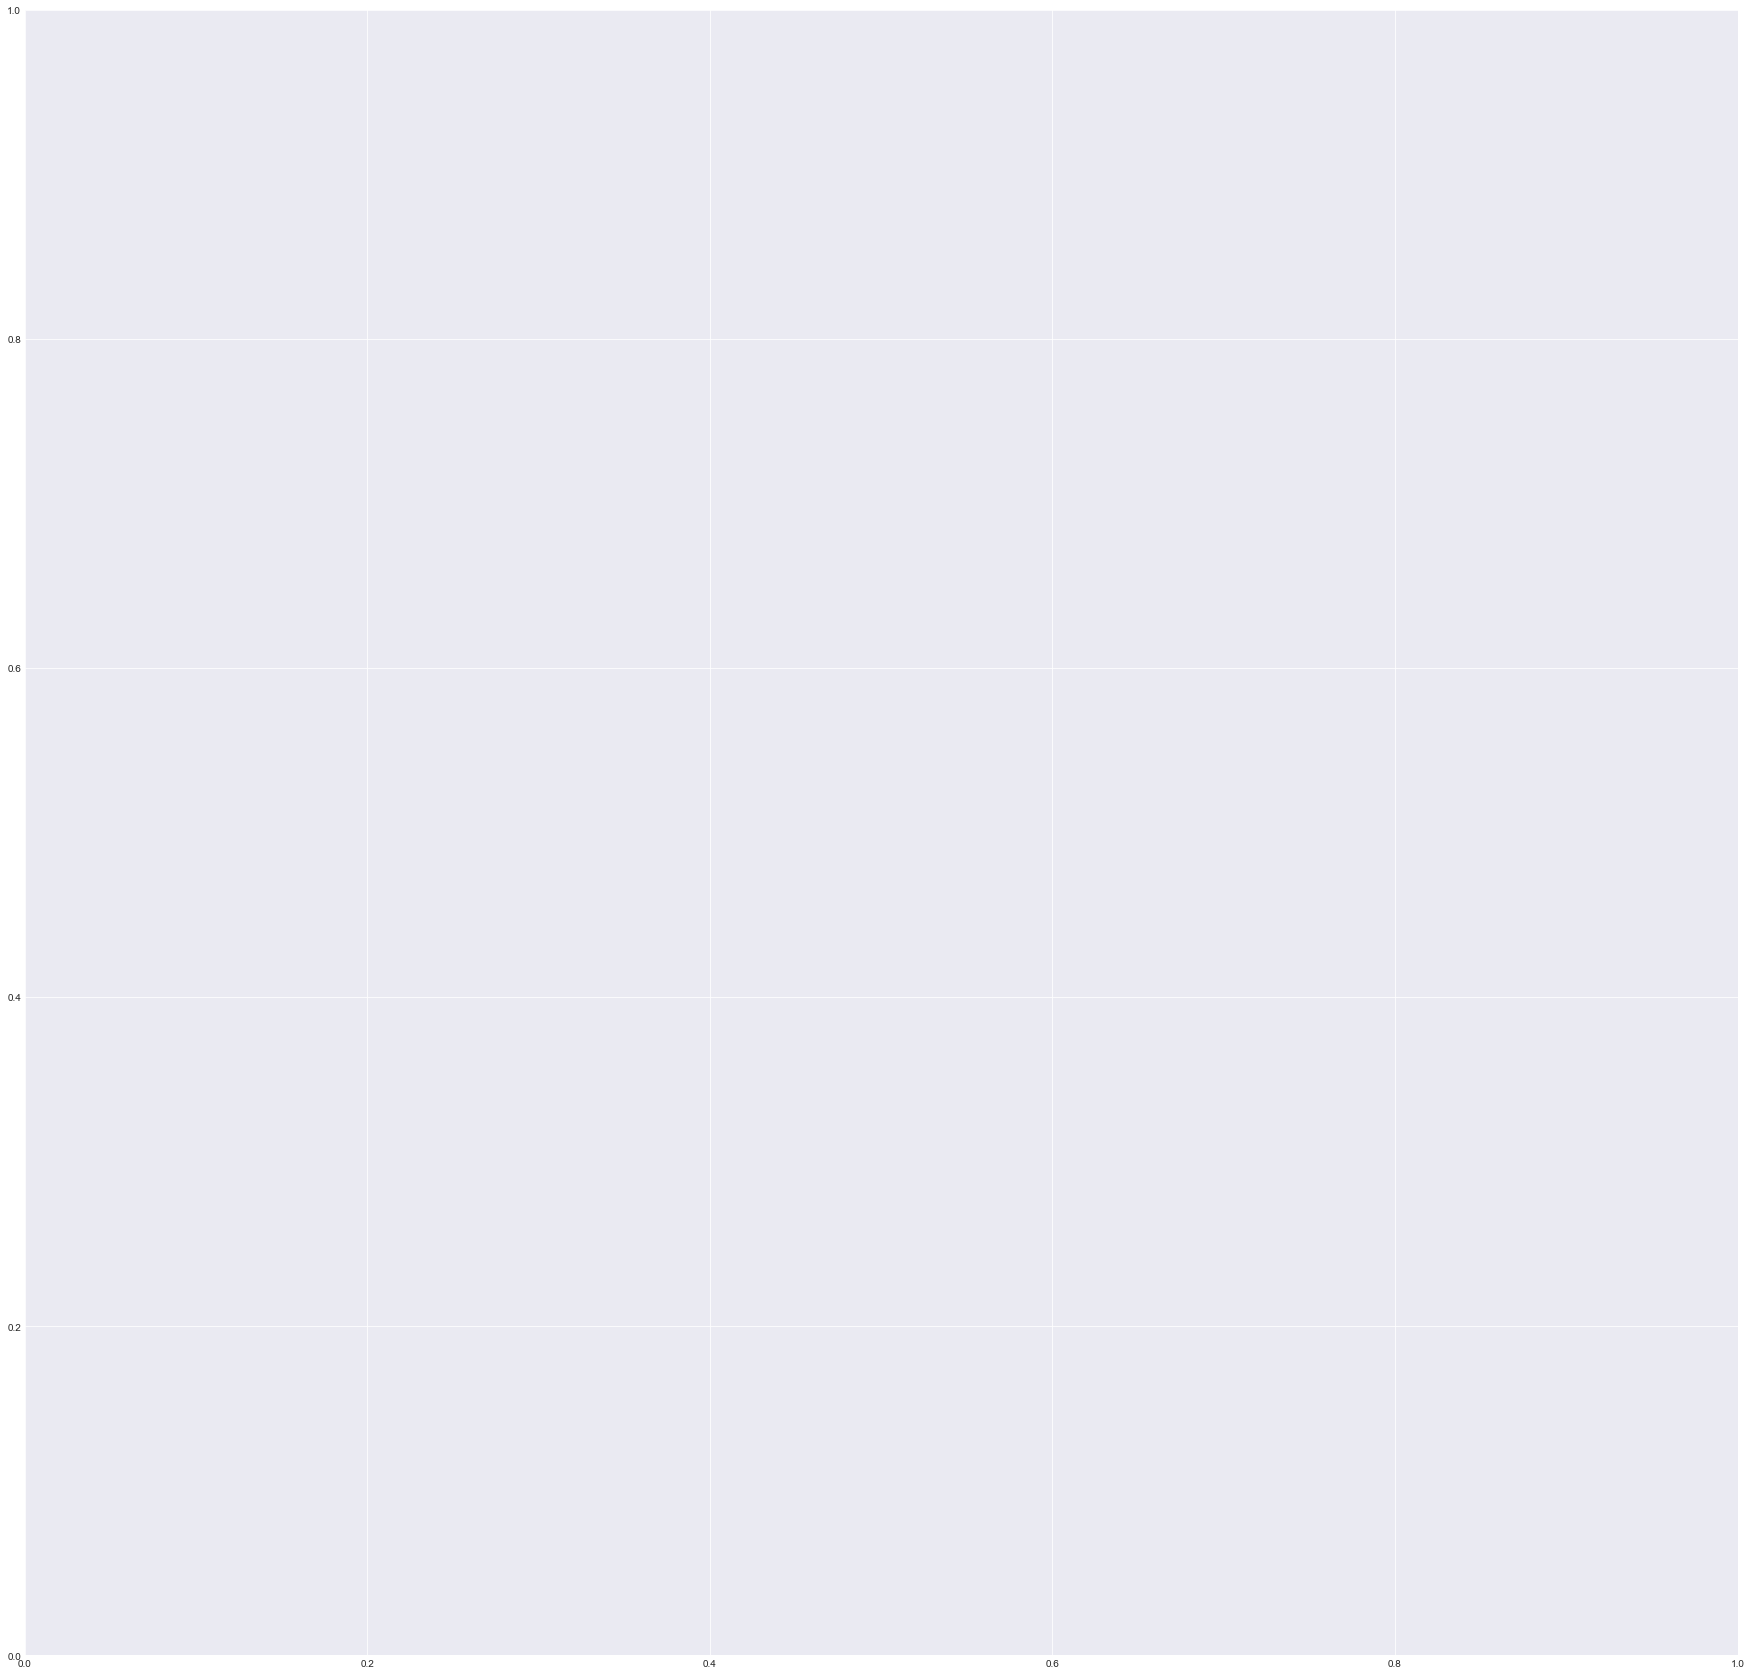

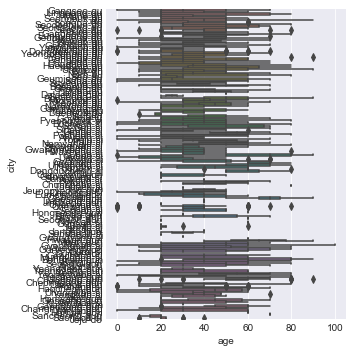

In [220]:
a4_dims = (30.7 ,30.27)
fig , ax = plt.subplots( figsize = a4_dims )
sns.factorplot( ax = ax ,data = df ,x = "age" ,y= "city" ,kind = "box" );

- cok fazla kategori var ama kullanılabilir 

### İnfection_case ile age tahmin edilir mi ? 

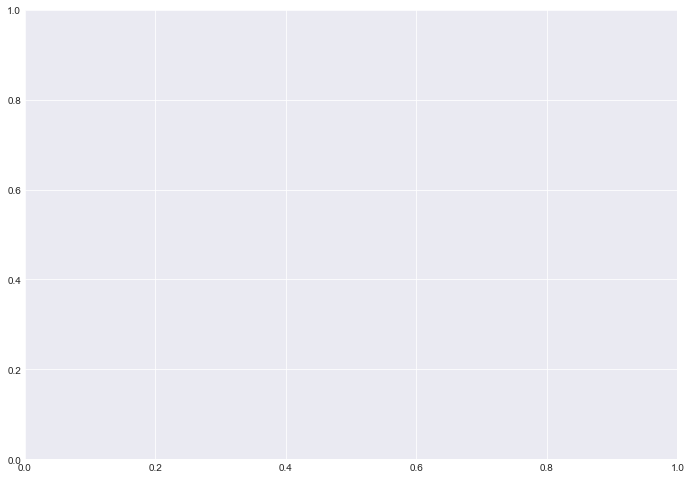

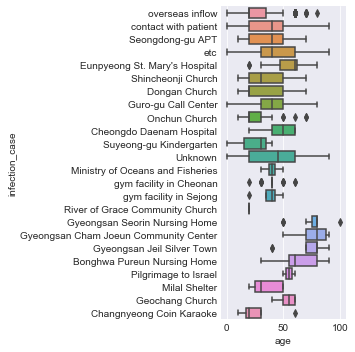

In [221]:
a4_dims = (11.7 ,8.27)
fig , ax = plt.subplots( figsize = a4_dims )
sns.factorplot(ax = ax , data = df, x ="age",y = "infection_case" ,kind = "box" );

- Age değişkenine bulaşıcı hastalığı aldığı yere göre atama yaplabilir örneğin gençler spor salonunda iken ileri yaşılılar kilisede olabilir 

### Age değişkenindeki boş değerleri doldurma 

In [222]:
df[df.age.isnull()]

,patient_id,sex,age,country,province,city,disease,infection_case,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,new_state
563,1000000564,NaN,NaN,Korea,Seoul,Jungnang-gu,0,etc,0.0,2020-04-06,2020-04-06,NaN,NaN,released,0
564,1000000565,NaN,NaN,Korea,Seoul,Seongdong-gu,0,overseas inflow,0.0,2020-04-06,2020-04-06,NaN,NaN,isolated,1
565,1000000566,NaN,NaN,Korea,Seoul,Gwanak-gu,0,overseas inflow,0.0,2020-04-06,2020-04-06,NaN,NaN,isolated,1
566,1000000567,NaN,NaN,Korea,Seoul,Gangnam-gu,0,overseas inflow,0.0,2020-04-06,2020-04-06,NaN,NaN,isolated,1
567,1000000568,NaN,NaN,Korea,Seoul,Nowon-gu,0,overseas inflow,0.0,2020-04-06,2020-04-06,NaN,NaN,isolated,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,6012000001,female,NaN,Korea,Gyeongsangbuk-do,Yeongdeok-gun,0,etc,1.0,2020-02-29,2020-02-29,NaN,NaN,released,0
2927,6012000002,NaN,NaN,Korea,Gyeongsangbuk-do,Yeongdeok-gun,0,etc,1.0,2020-02-29,2020-02-29,NaN,NaN,released,0
3228,6100000031,NaN,NaN,Korea,Gyeongsangnam-do,Unknown,0,Unknown,0.0,2020-02-26,2020-02-26,NaN,NaN,isolated,1
3229,6100000032,NaN,NaN,Korea,Gyeongsangnam-do,Unknown,0,Unknown,0.0,2020-02-26,2020-02-26,NaN,NaN,isolated,1


In [223]:
index_nan_age = df[df["age"].isnull()].index

In [224]:
for i in index_nan_age:
    
    med1 = df[(df["infection_case"] == df.iloc[i]["infection_case"])&
              (df["country"] == df.iloc[i]["country"]) &
              (df["province"] == df.iloc[i]["province"])]["age"].median()
    
    
    med2 = df[ (df["infection_case"]  == df.iloc[i]["infection_case"]) &
               (df["country"] == df.iloc[i]["country"])]["age"].median()
    
    
    med3 = df[ (df["infection_case"]  == df.iloc[i]["infection_case"])]["age"].median()
              
    med4 = df["age"].median()
              
    if not np.isnan(med1):
        df["age"].iloc[i] = med1
    else:
              
        df["age"].iloc[i] = med2
              
        if np.isnan(med2):
            df["age"].iloc[i] = med3
            if np.isnan(med3):
                df["age"].iloc[i] = med4
                
              

In [225]:
print( "med1 : {}\n med2 : {}\n med3 : {}\n med4 : \n" .format( med1 ,med2 ,med3 ,med4 ) )

med1 : 40.0
 med2 : 40.0
 med3 : 40.0
 med4 : 



In [226]:
df["age"].median()

40.0

In [227]:
df.age.isnull().sum()

4

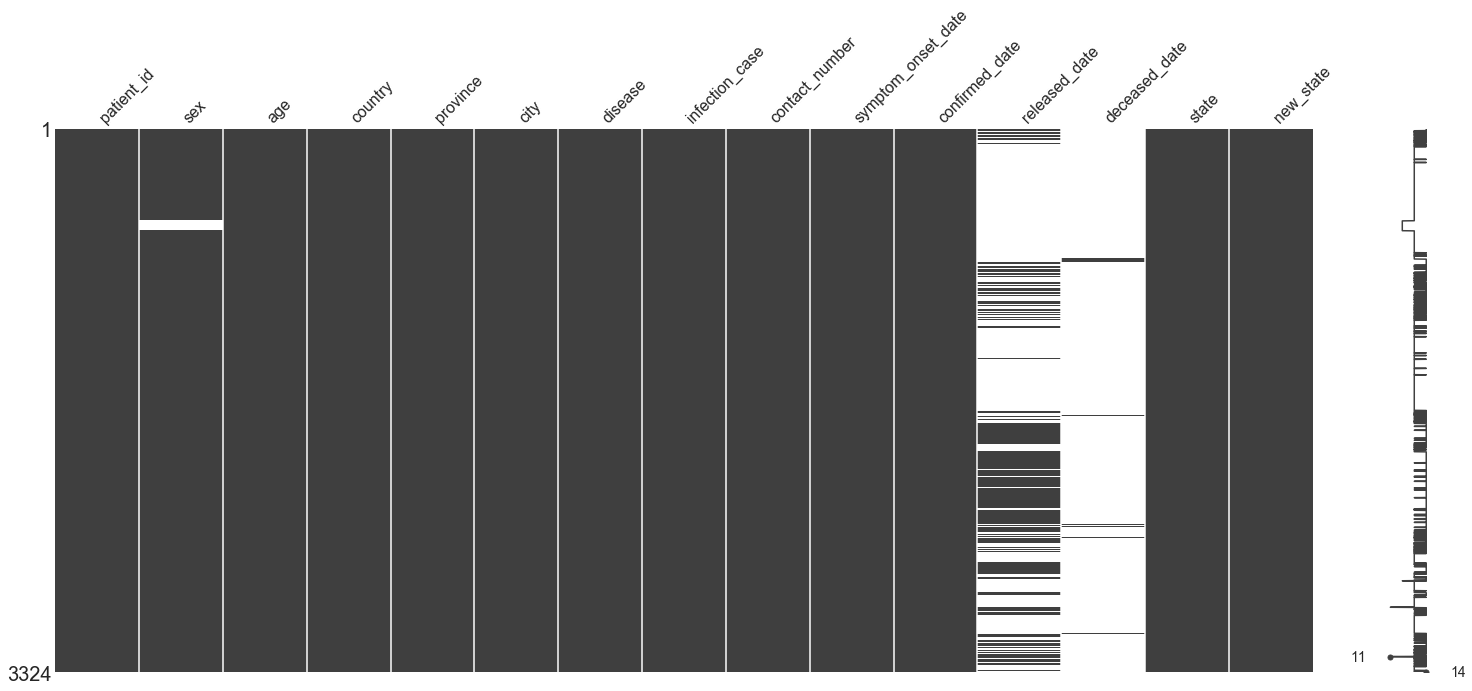

In [228]:
msno.matrix(df);

### Sex değişkenindeki boş değerleri doldurma 

In [229]:
df.sex.value_counts()

female    1829
male      1429
Name: sex, dtype: int64

In [230]:
df.sex.isnull().sum()

66

In [231]:
df[df.sex.isnull()].index

Int64Index([ 563,  564,  565,  566,  567,  568,  569,  570,  571,  572,  573,
             574,  575,  576,  577,  578,  579,  580,  581,  582,  583,  584,
             585,  586,  587,  588,  589,  590,  591,  592,  593,  594,  595,
             596,  597,  598,  599,  600,  601,  602,  603,  604,  605,  606,
             607,  608,  609,  610,  611,  612,  613,  614,  615,  616,  617,
             618,  619,  620,  621,  622,  623, 2763, 2927, 3228, 3229, 3230],
           dtype='int64')

In [232]:
a = df[df.sex.isnull()].index[:33]

In [233]:
b = df[df.sex.isnull()].index[33:]
                
              

In [234]:
a

Int64Index([563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575,
            576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588,
            589, 590, 591, 592, 593, 594, 595],
           dtype='int64')

In [235]:
df.sex.dtype

dtype('O')

In [236]:
for i in a :
    df.iloc[i]["sex"] = "female"


In [237]:
for i in b :
    df.iloc[i]["sex"] = "male"


In [238]:
df.sex.fillna("male" ,inplace = True)

In [239]:
df.sex.value_counts()

female    1829
male      1495
Name: sex, dtype: int64

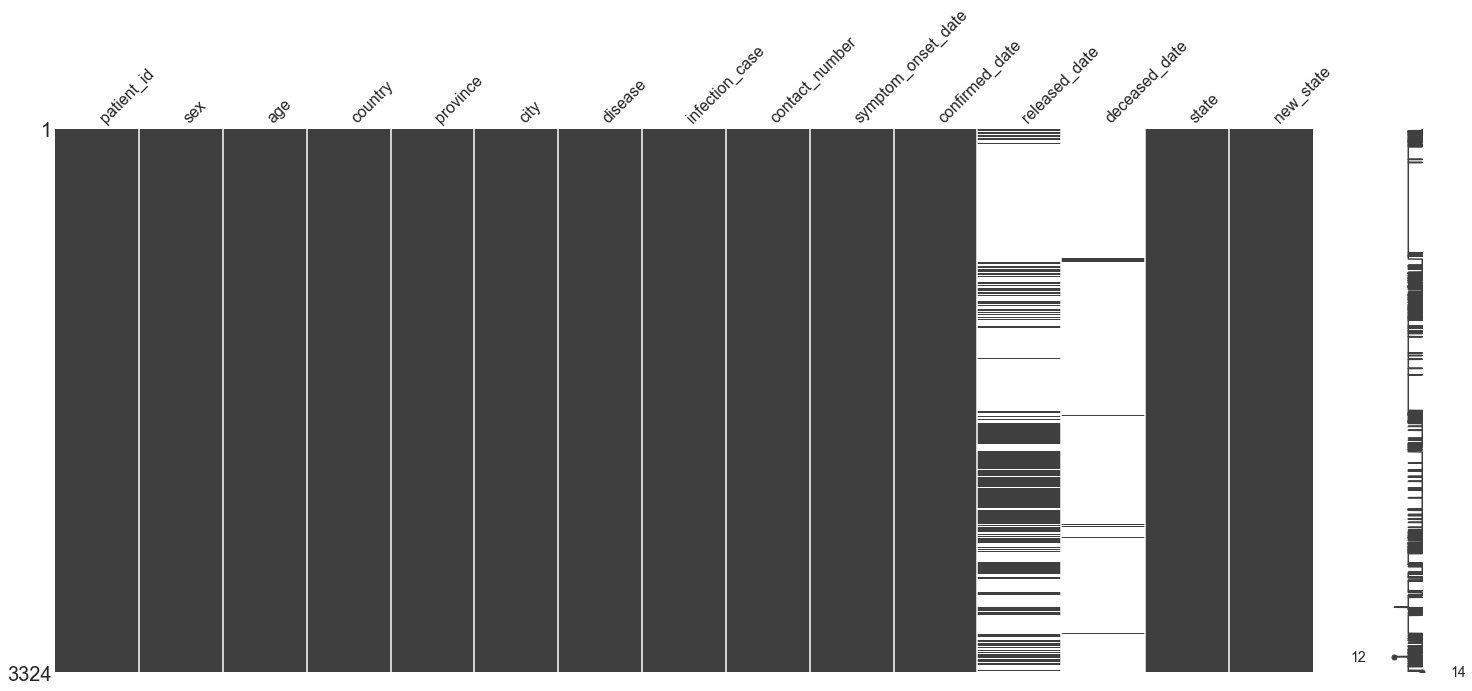

In [240]:
msno.matrix(df);

<a id = 21 ></a>
# Veri görselleştirme

In [241]:
df.columns

Index(['patient_id', 'sex', 'age', 'country', 'province', 'city', 'disease',
       'infection_case', 'contact_number', 'symptom_onset_date',
       'confirmed_date', 'released_date', 'deceased_date', 'state',
       'new_state'],
      dtype='object')

### Symptom_onset_date -count

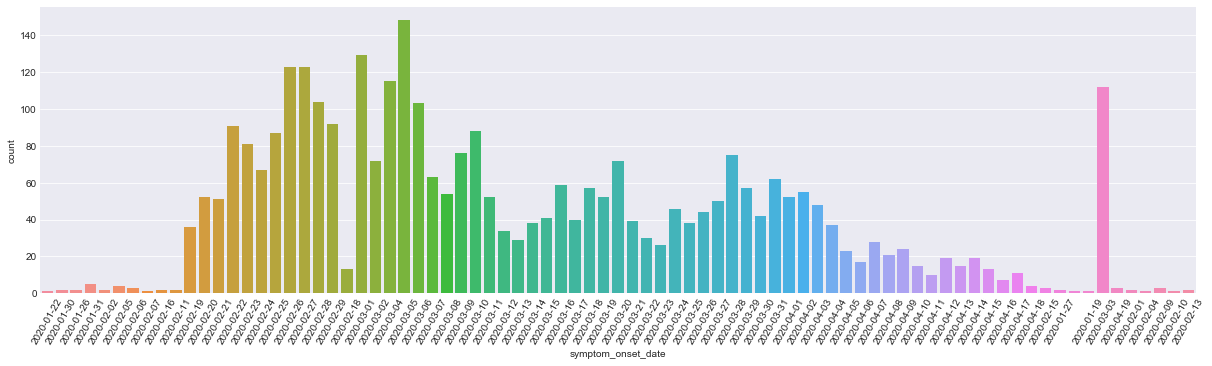

In [242]:
a4_dims = (20.7 ,5.27)
fig , ax = plt.subplots( figsize = a4_dims )
sns.countplot(data = df , x = "symptom_onset_date" ,saturation=0.9);
plt.xticks(rotation = 60);

- 2020-01-19 ' un orada ne olmuş öyle 

### Confirmed_date -count

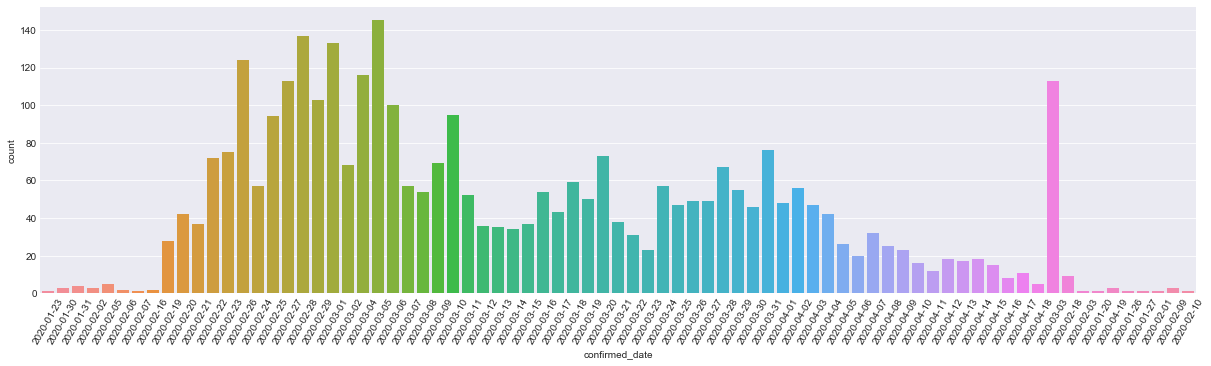

In [243]:
a4_dims = (20.7 ,5.27)
fig , ax = plt.subplots( figsize = a4_dims )
sns.countplot(data = df , x = "confirmed_date" ,saturation=0.9);
plt.xticks(rotation = 60);

### Released_date - count

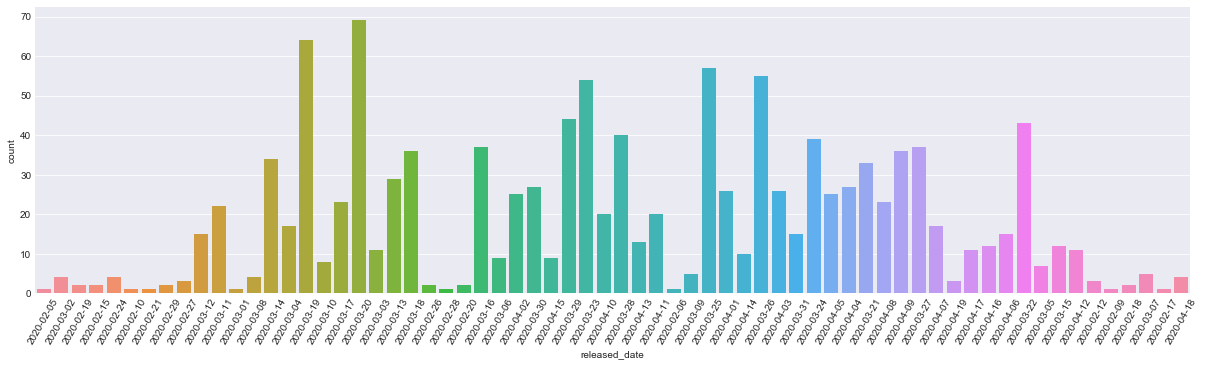

In [244]:

a4_dims = (20.7 ,5.27)
fig , ax = plt.subplots( figsize = a4_dims )
sns.countplot(data = df , x = "released_date" ,saturation=0.9);
plt.xticks(rotation = 60);

### deceased_date -count

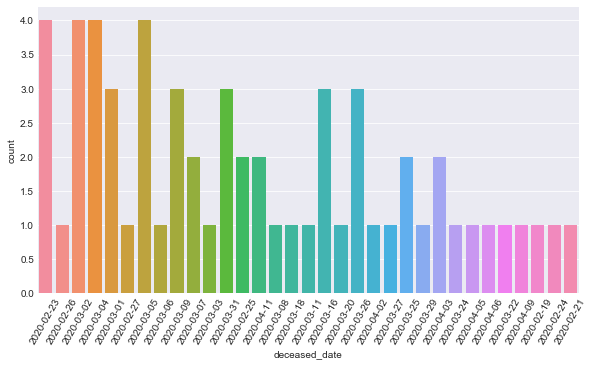

In [245]:
a4_dims = (9.7 ,5.27)
fig , ax = plt.subplots( figsize = a4_dims )
sns.countplot(data = df , x = "deceased_date" ,saturation=0.9);
plt.xticks(rotation = 60);

### Sex - state 

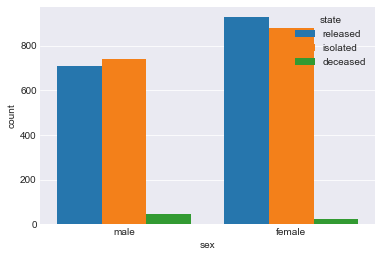

In [246]:
sns.countplot(data = df , x = "sex", hue="state"  ,saturation=0.9);

### Age - State

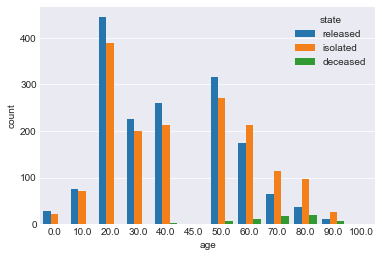

In [247]:
sns.countplot(data = df , x = "age", hue="state"  ,saturation=0.9);

### Disease - state

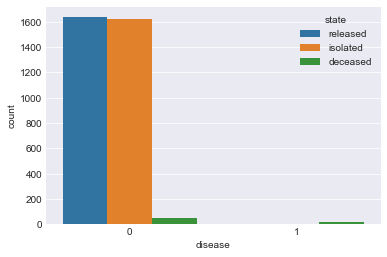

In [248]:
sns.countplot(data = df ,x = "disease" , hue= "state");

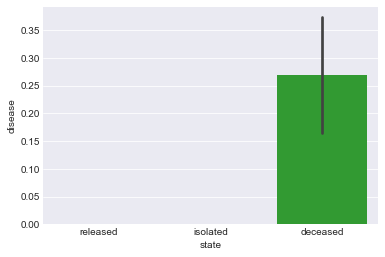

In [249]:
sns.barplot( data = df ,x = "state" ,y = "disease" ,saturation=0.9);

In [250]:
df.state.value_counts()

released    1637
isolated    1620
deceased      67
Name: state, dtype: int64

### Country - State

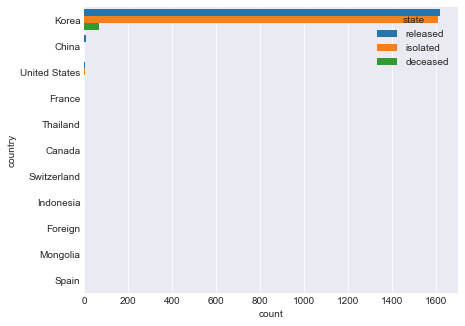

In [251]:
a4_dims = (6.7 ,5.27)
fig , ax = plt.subplots( figsize = a4_dims )
sns.countplot(ax = ax, data = df , y = "country"  ,hue = "state" ,saturation=0.9);

### Province -State

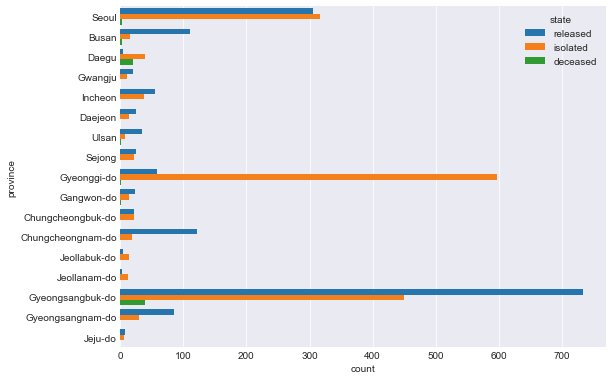

In [252]:
a4_dims = (8.7 ,6.27)
fig , ax = plt.subplots( figsize = a4_dims )
sns.countplot( data = df , y = "province"  ,hue = "state" ,saturation=0.9);

### City - state

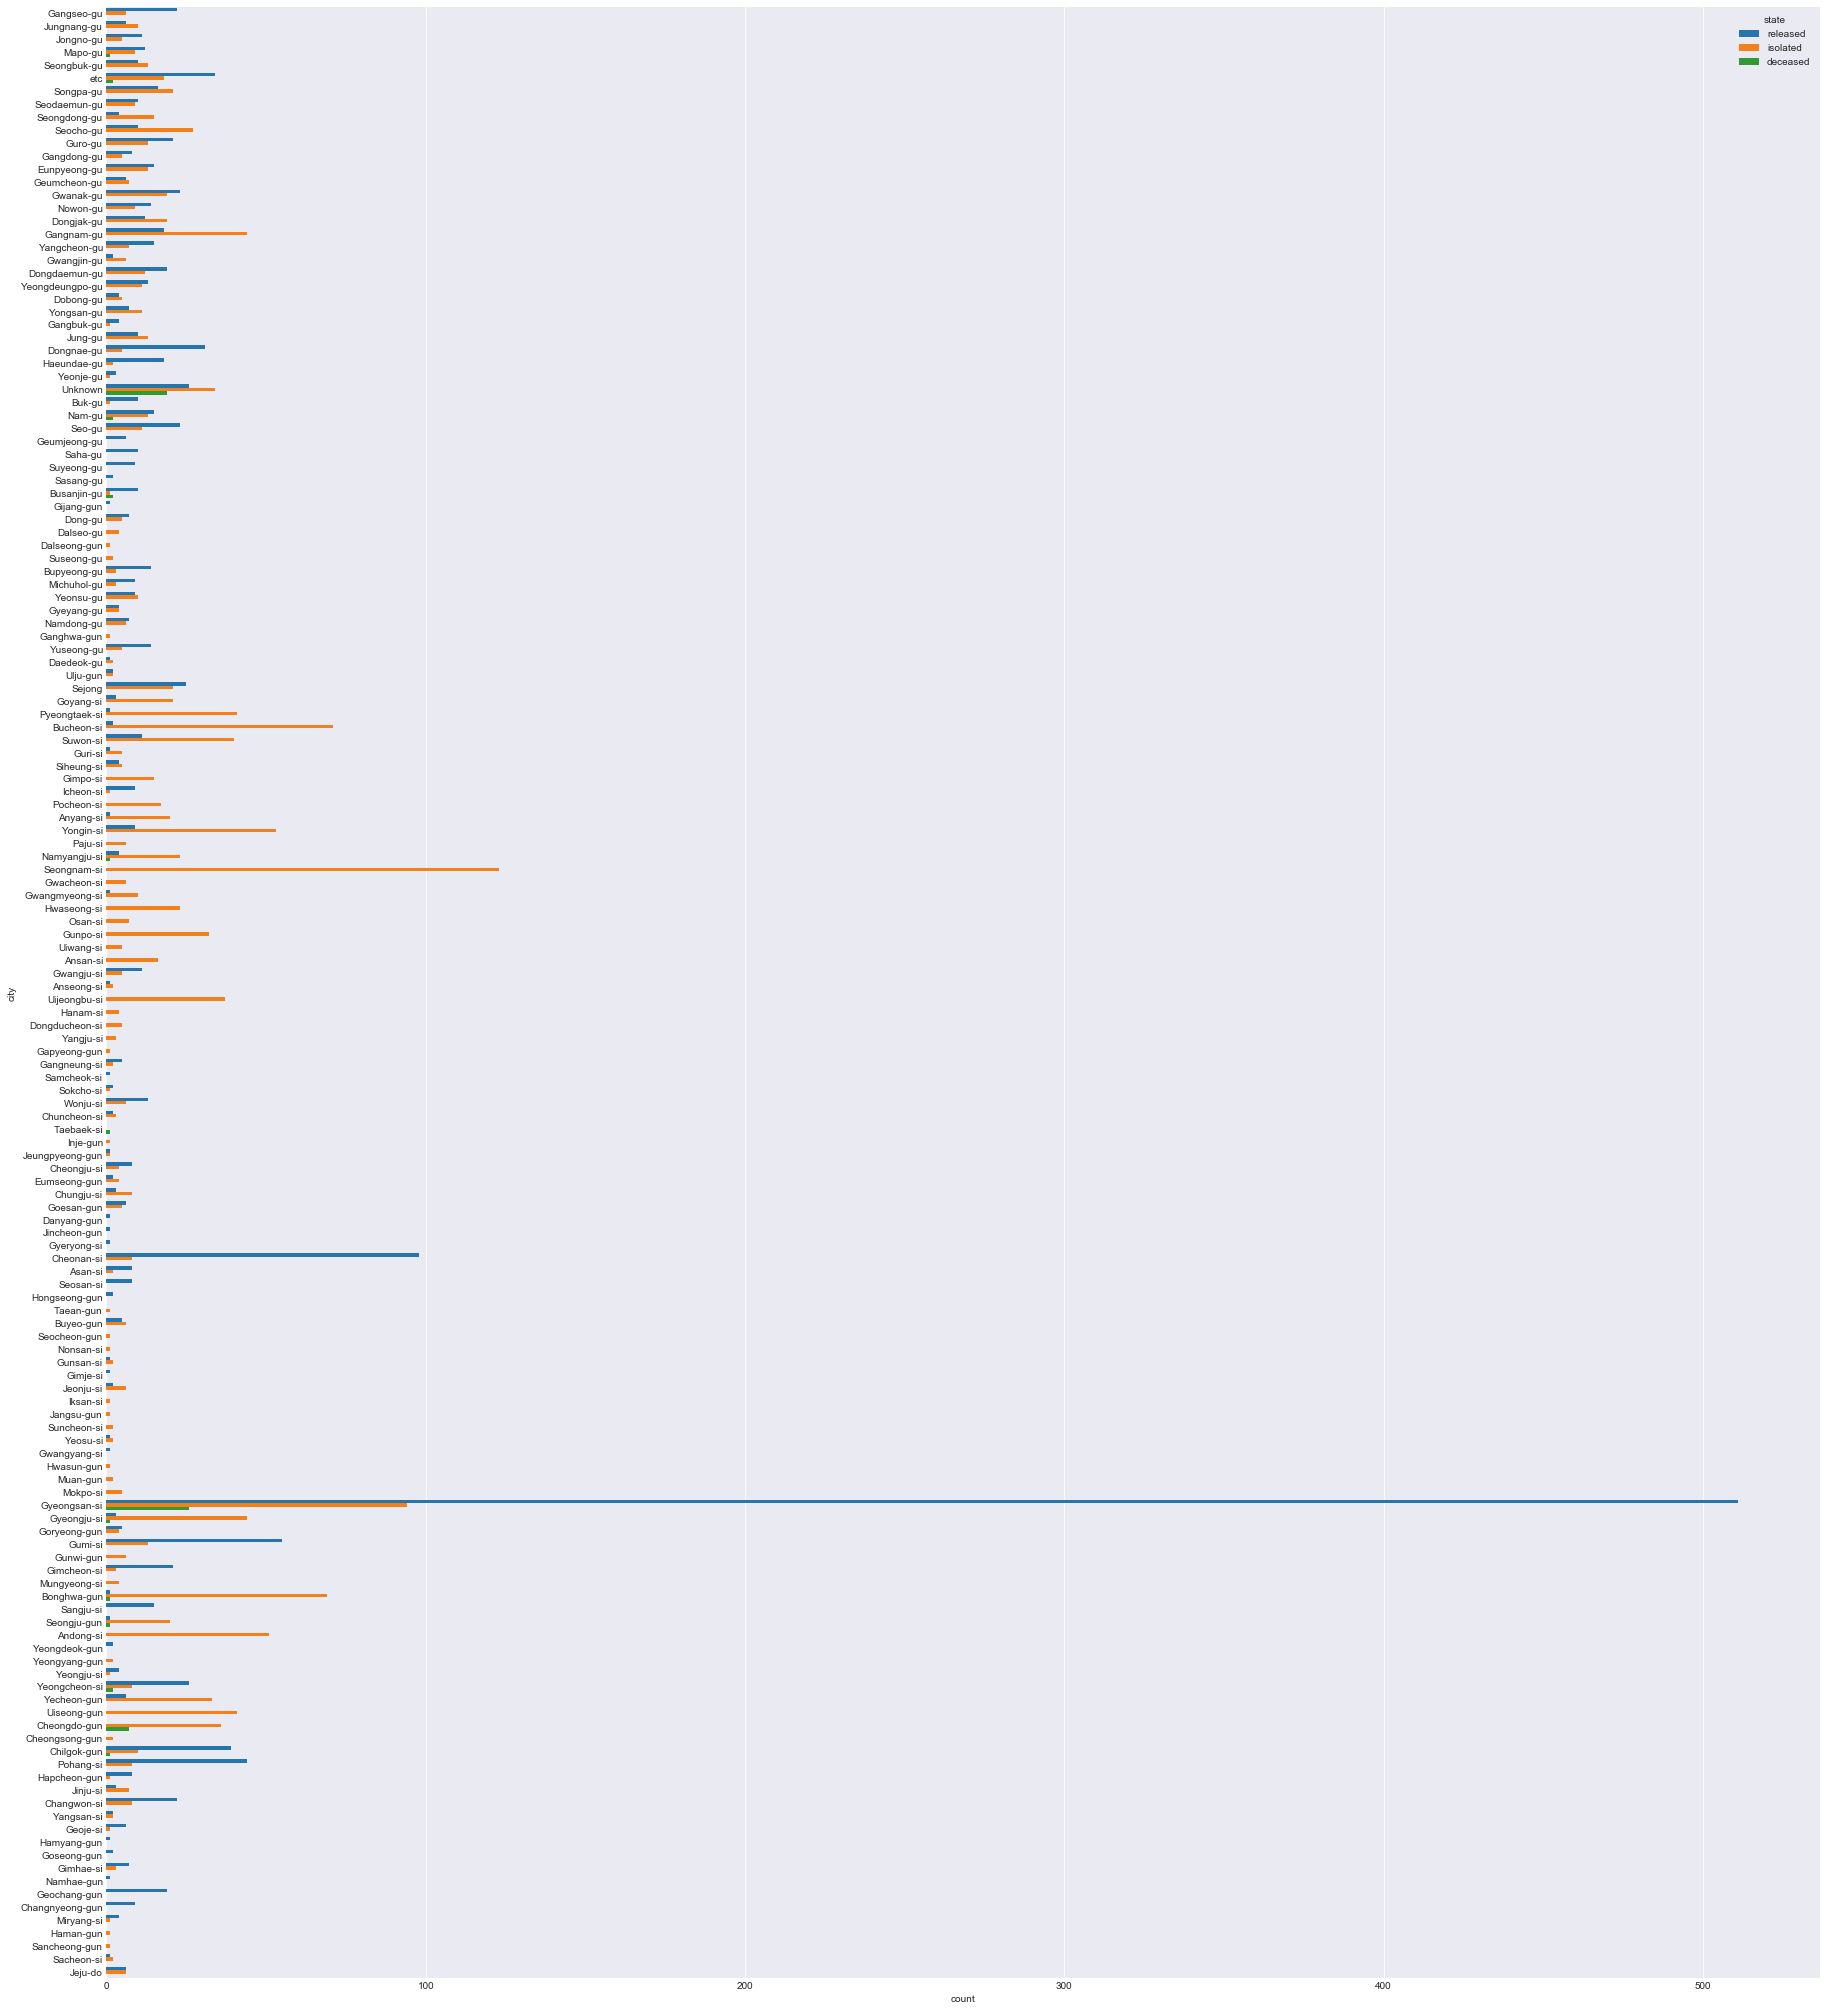

In [253]:
a4_dims = (30.7 ,36.27)
fig , ax = plt.subplots( figsize = a4_dims )
sns.countplot( data = df , y = "city" , hue = "state" ,saturation=0.9);

### infection_case - state 

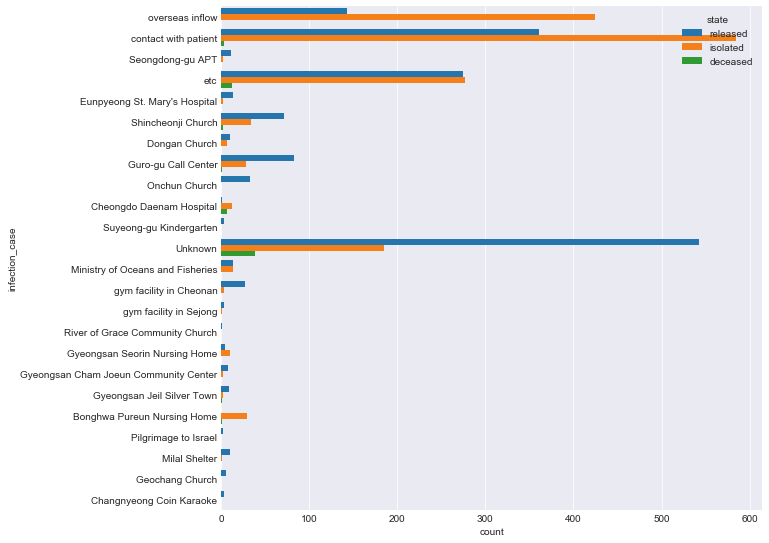

In [254]:
a4_dims = (9.7 ,9.27)
fig , ax = plt.subplots( figsize = a4_dims )
sns.countplot( data = df ,y = "infection_case"  ,hue = "state" ,saturation=0.9);


### contact_number - state

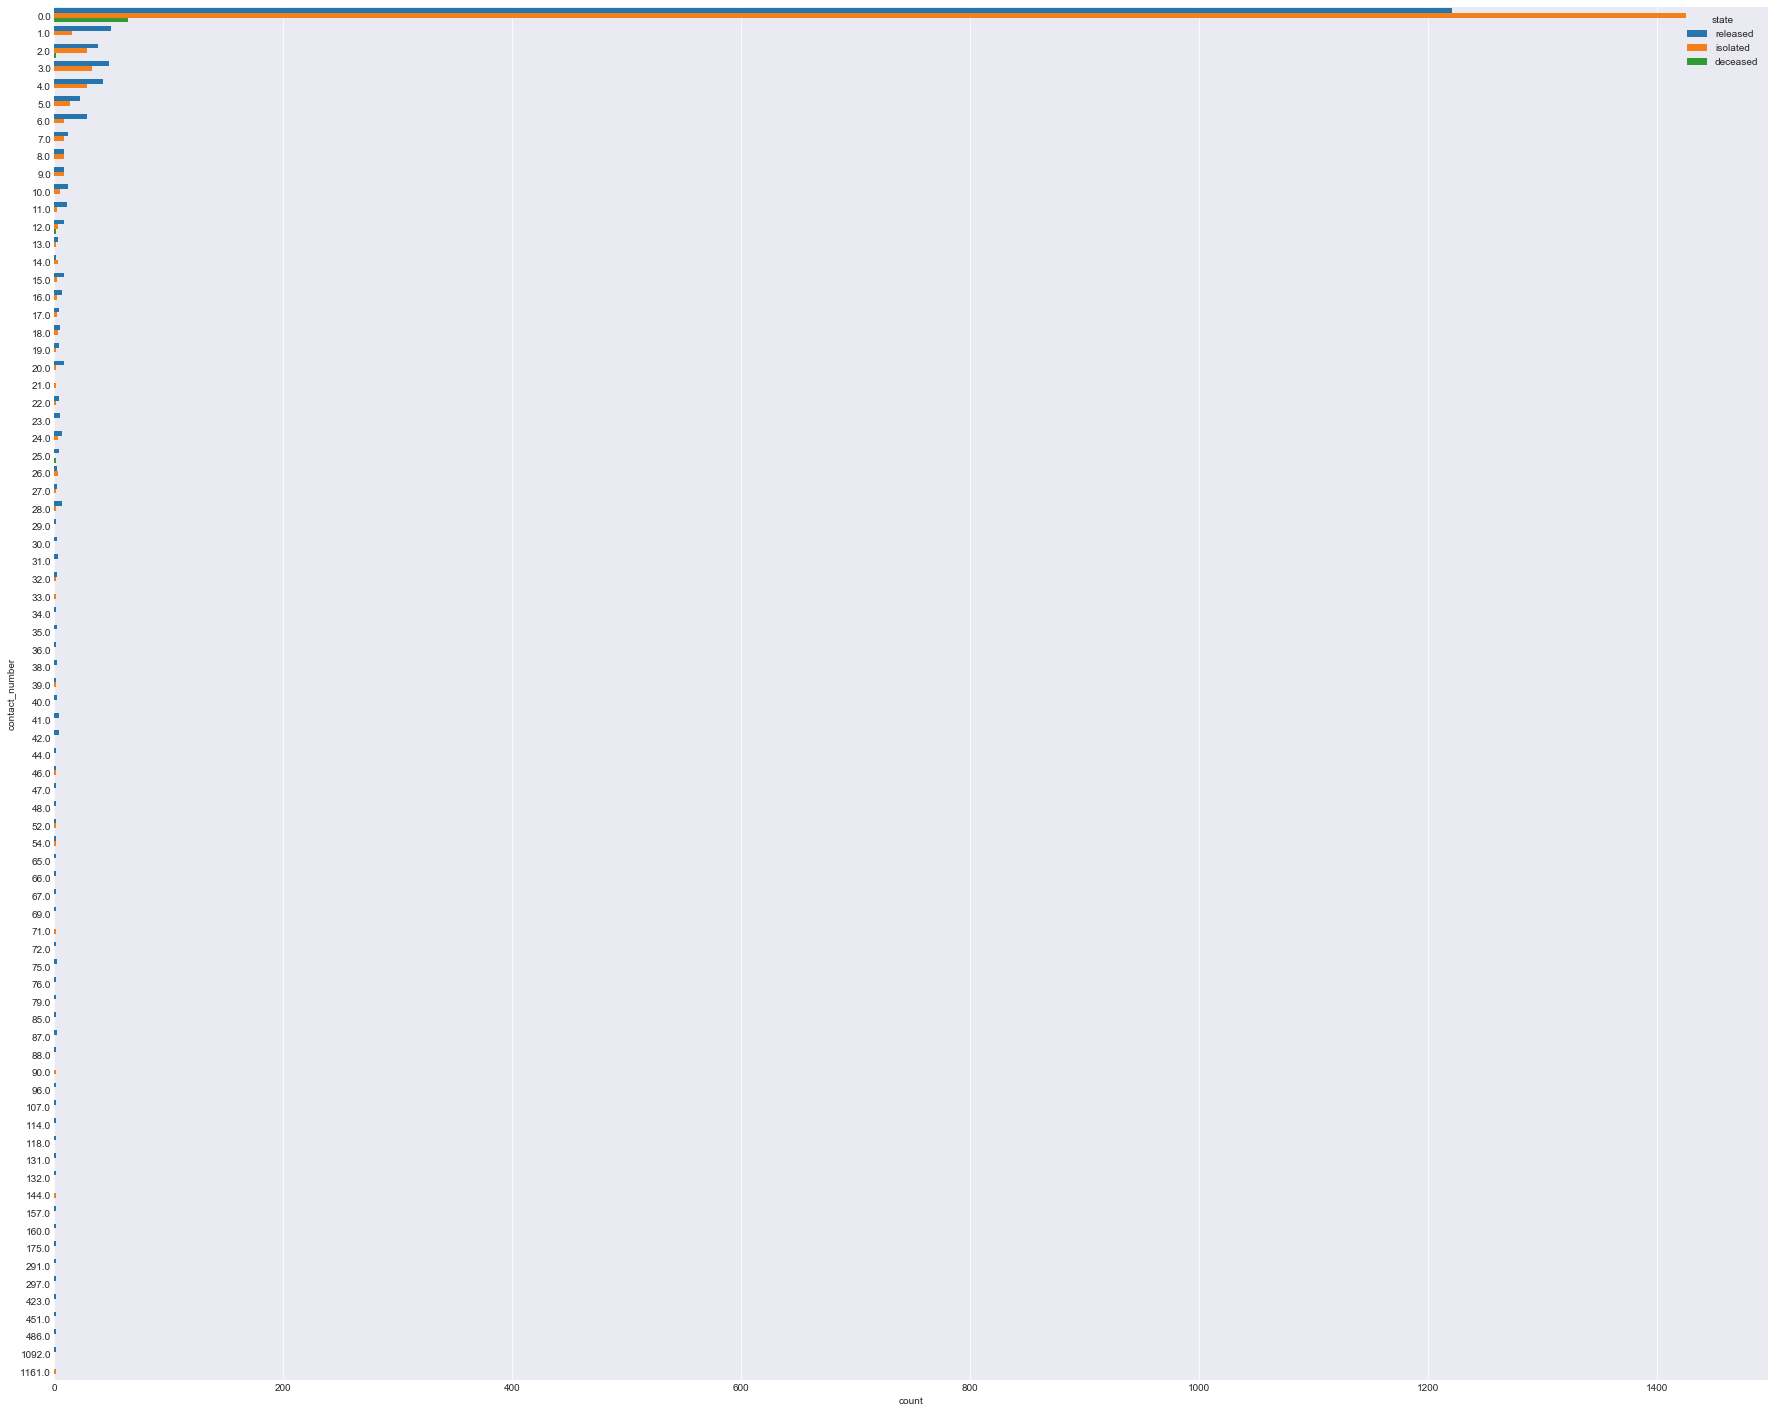

In [255]:
a4_dims = (30.7 ,25.27)
fig , ax = plt.subplots( figsize = a4_dims )
sns.countplot( data = df ,y = "contact_number"  ,hue = "state" ,saturation=0.9);


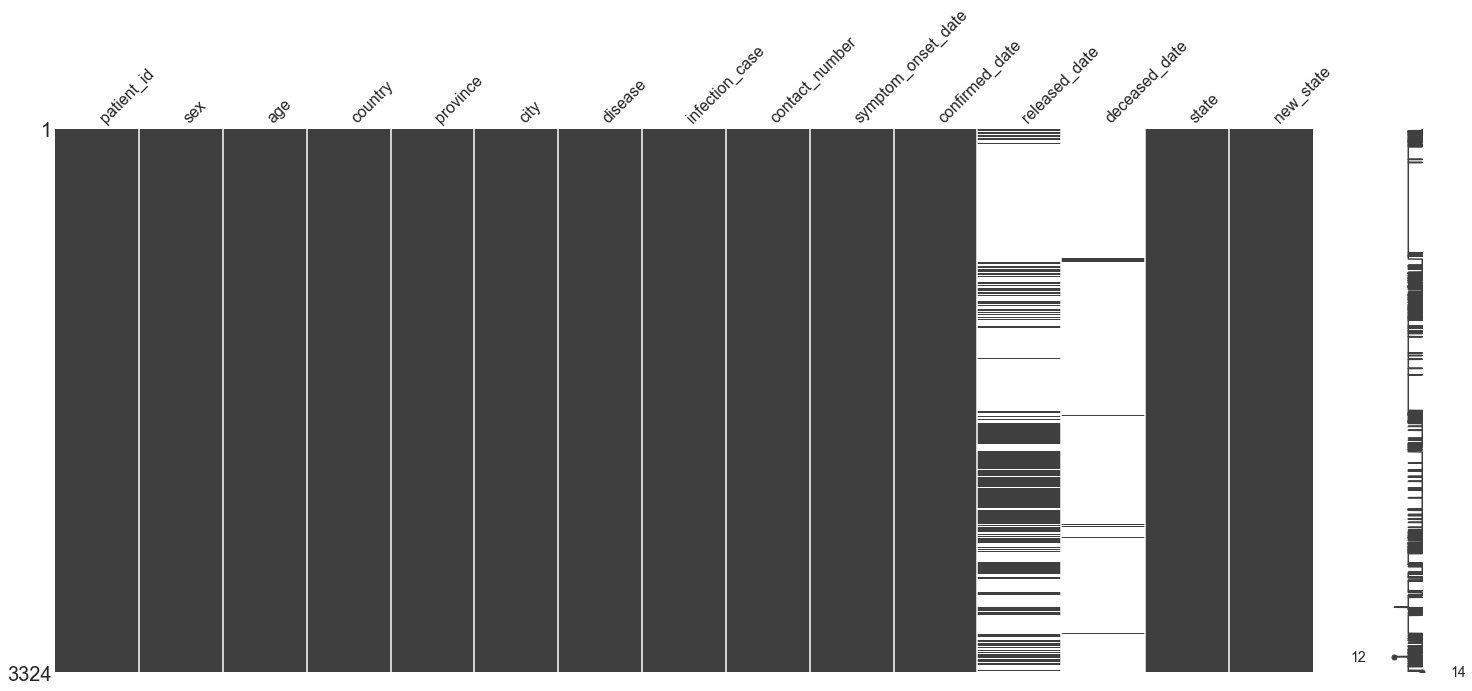

In [256]:
msno.matrix( df );

In [257]:
df.columns

Index(['patient_id', 'sex', 'age', 'country', 'province', 'city', 'disease',
       'infection_case', 'contact_number', 'symptom_onset_date',
       'confirmed_date', 'released_date', 'deceased_date', 'state',
       'new_state'],
      dtype='object')

In [258]:
cor_list = ['sex', 'age', 'country', 'province', 'city', 'disease',
       'infection_case', 'contact_number' ,'state']
corr = df[cor_list].corr() 
print(corr)

                     age   disease  contact_number
age             1.000000  0.082370       -0.017424
disease         0.082370  1.000000       -0.008079
contact_number -0.017424 -0.008079        1.000000


 

### Infection_case - age - state

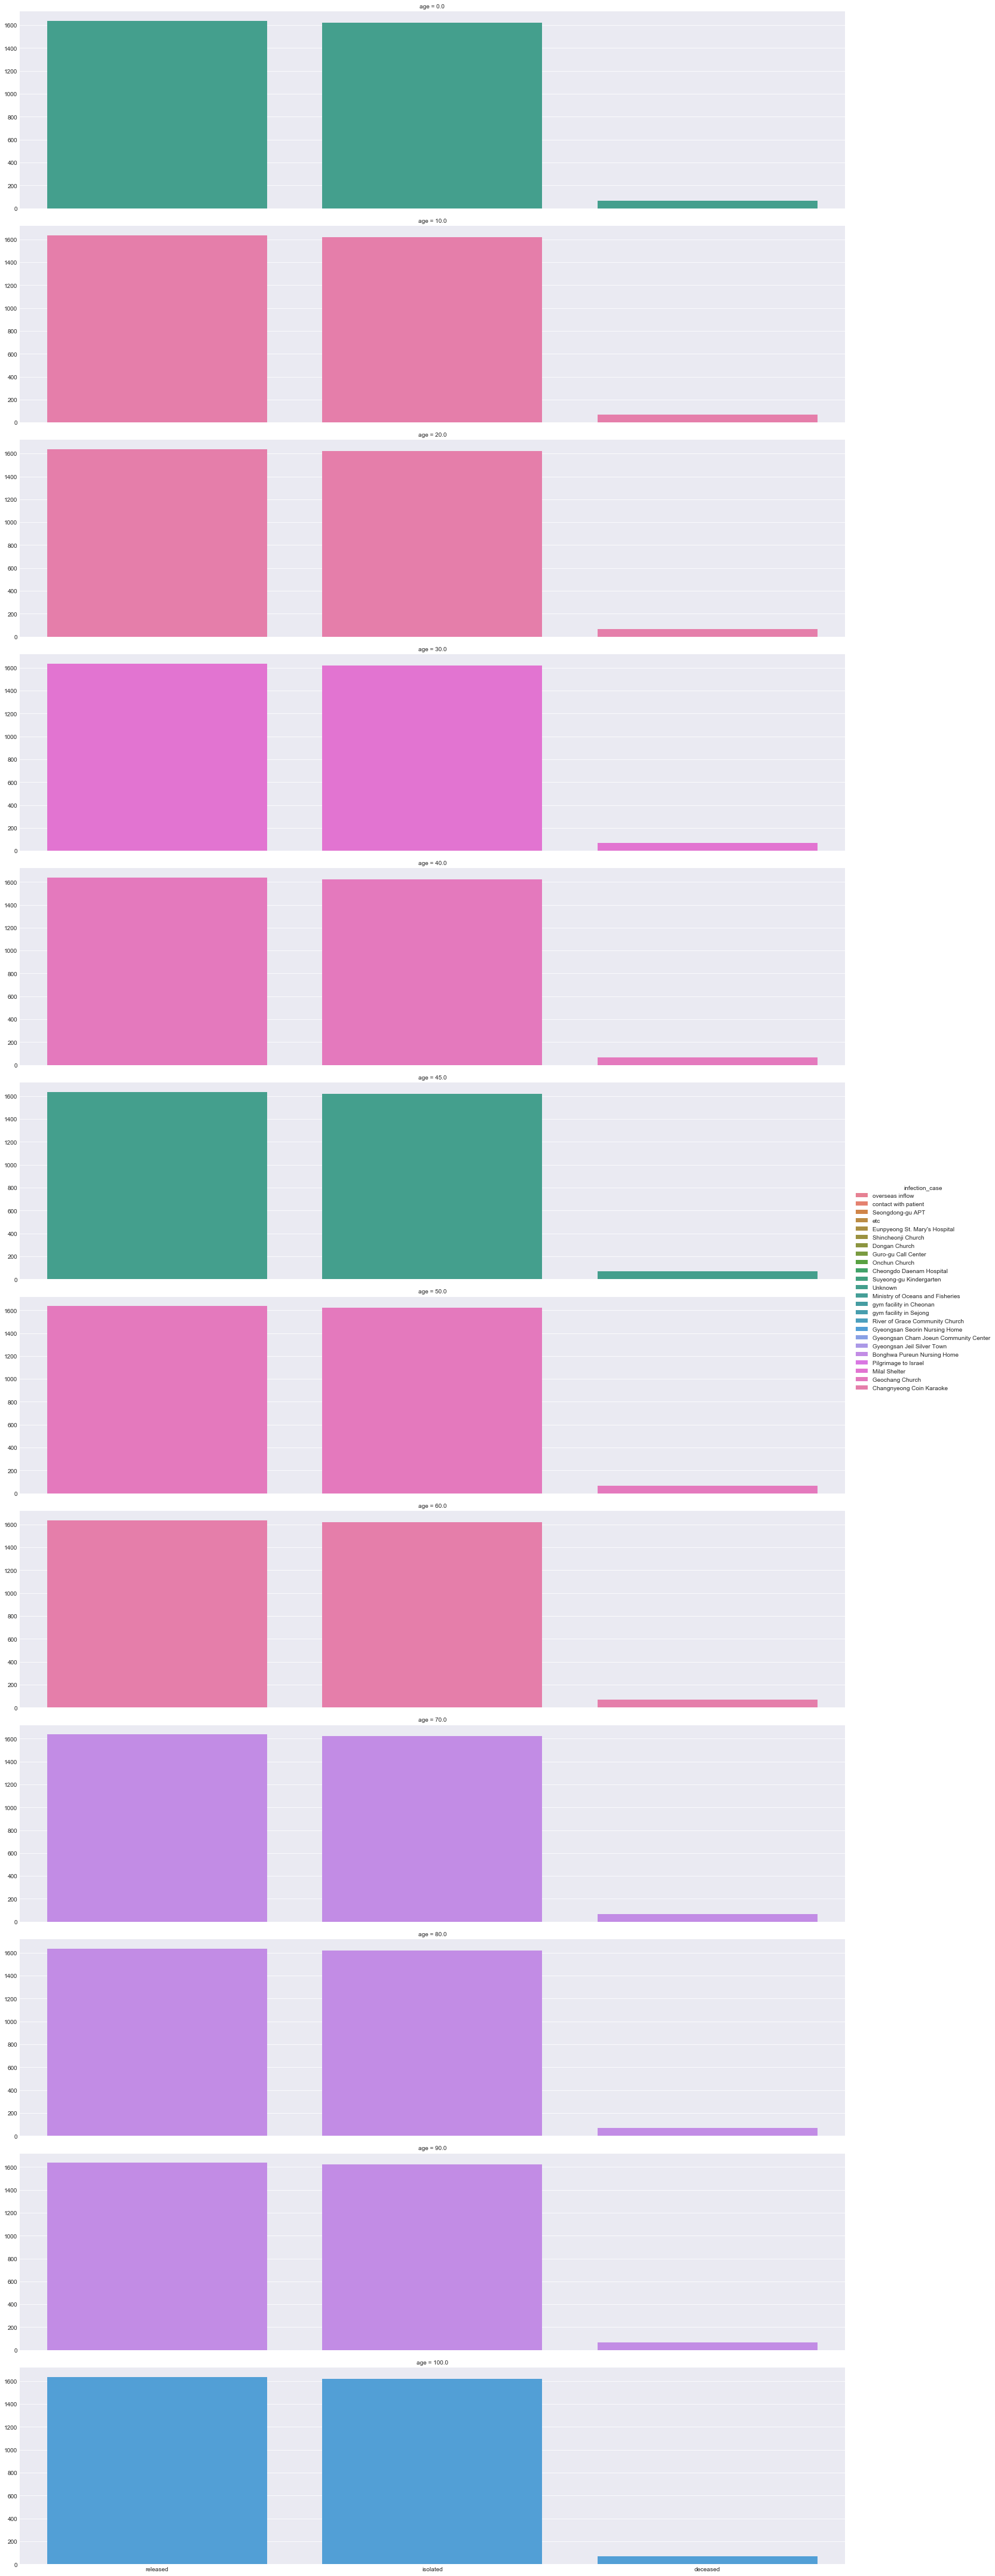

In [259]:

(sns
.FacetGrid(data = df ,
          hue = "infection_case",
          
          row = "age",
          height = 5,
          aspect = 4
          )
.map(sns.barplot ,x = df.state.value_counts().index ,y =  df.state.value_counts().values)
.add_legend()

);

### Disease - Age -State

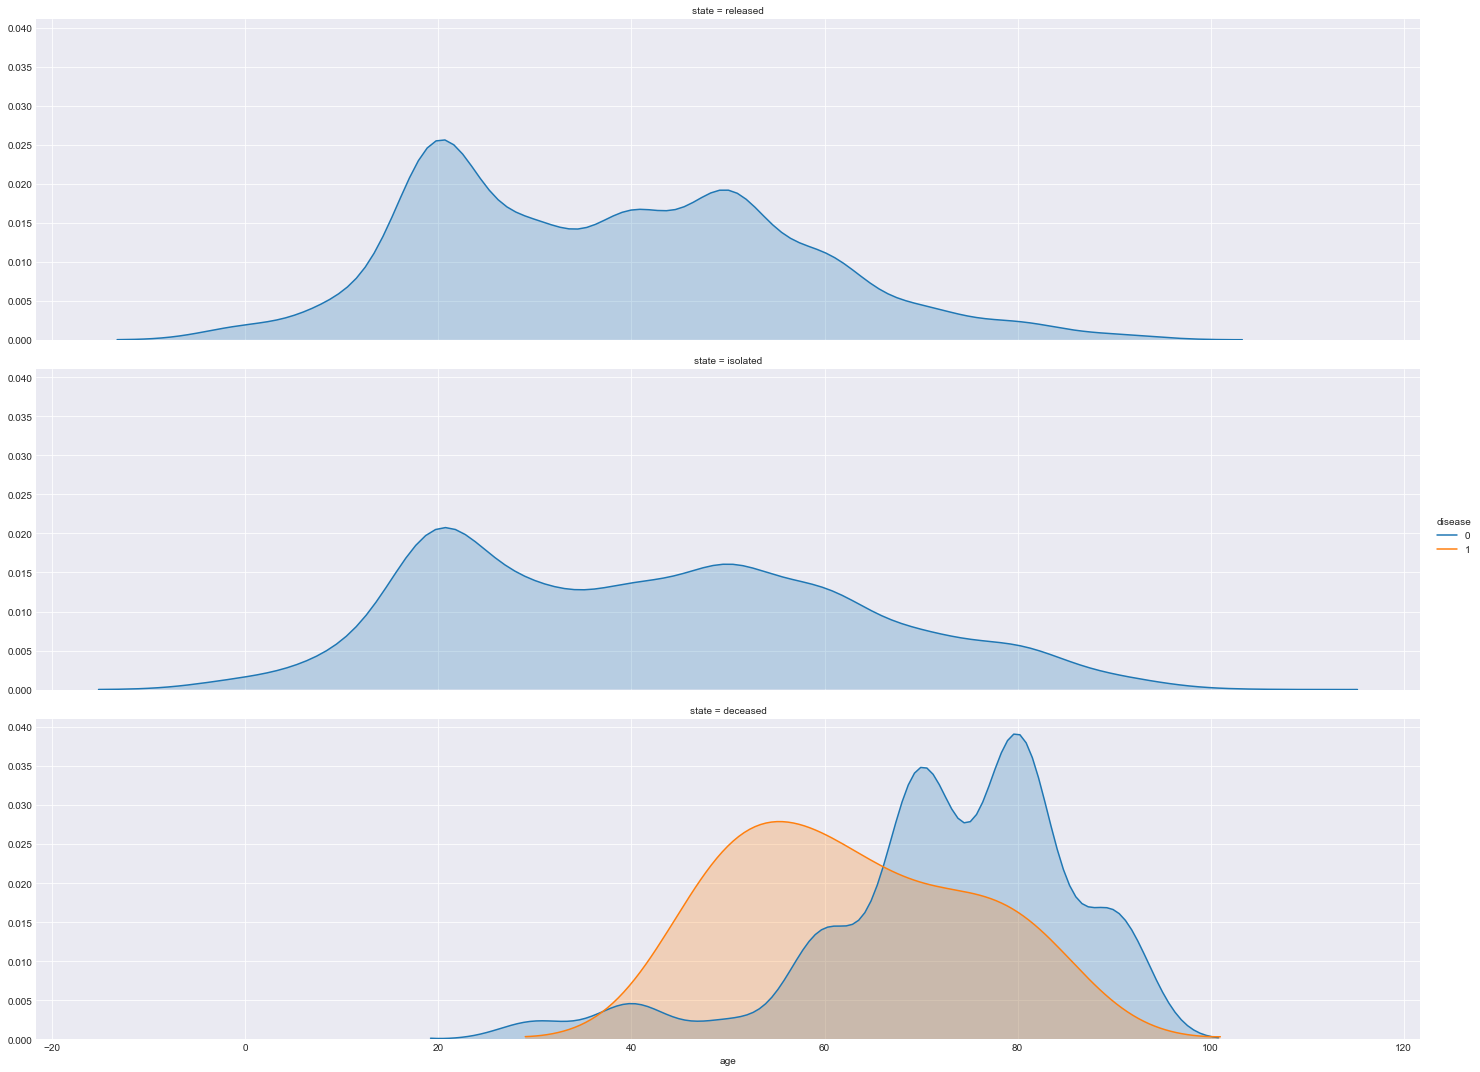

In [260]:
(sns
.FacetGrid(data = df ,
          hue = "disease",
          row = "state",
          
          height = 5,
          aspect = 4
          )
.map(sns.kdeplot ,"age" ,shade = True )
.add_legend()

);

- Yaş dağılımına göre hatalıklı olanların durumlarının gösterildiği güzel bir grafik 

### Country - Age - State

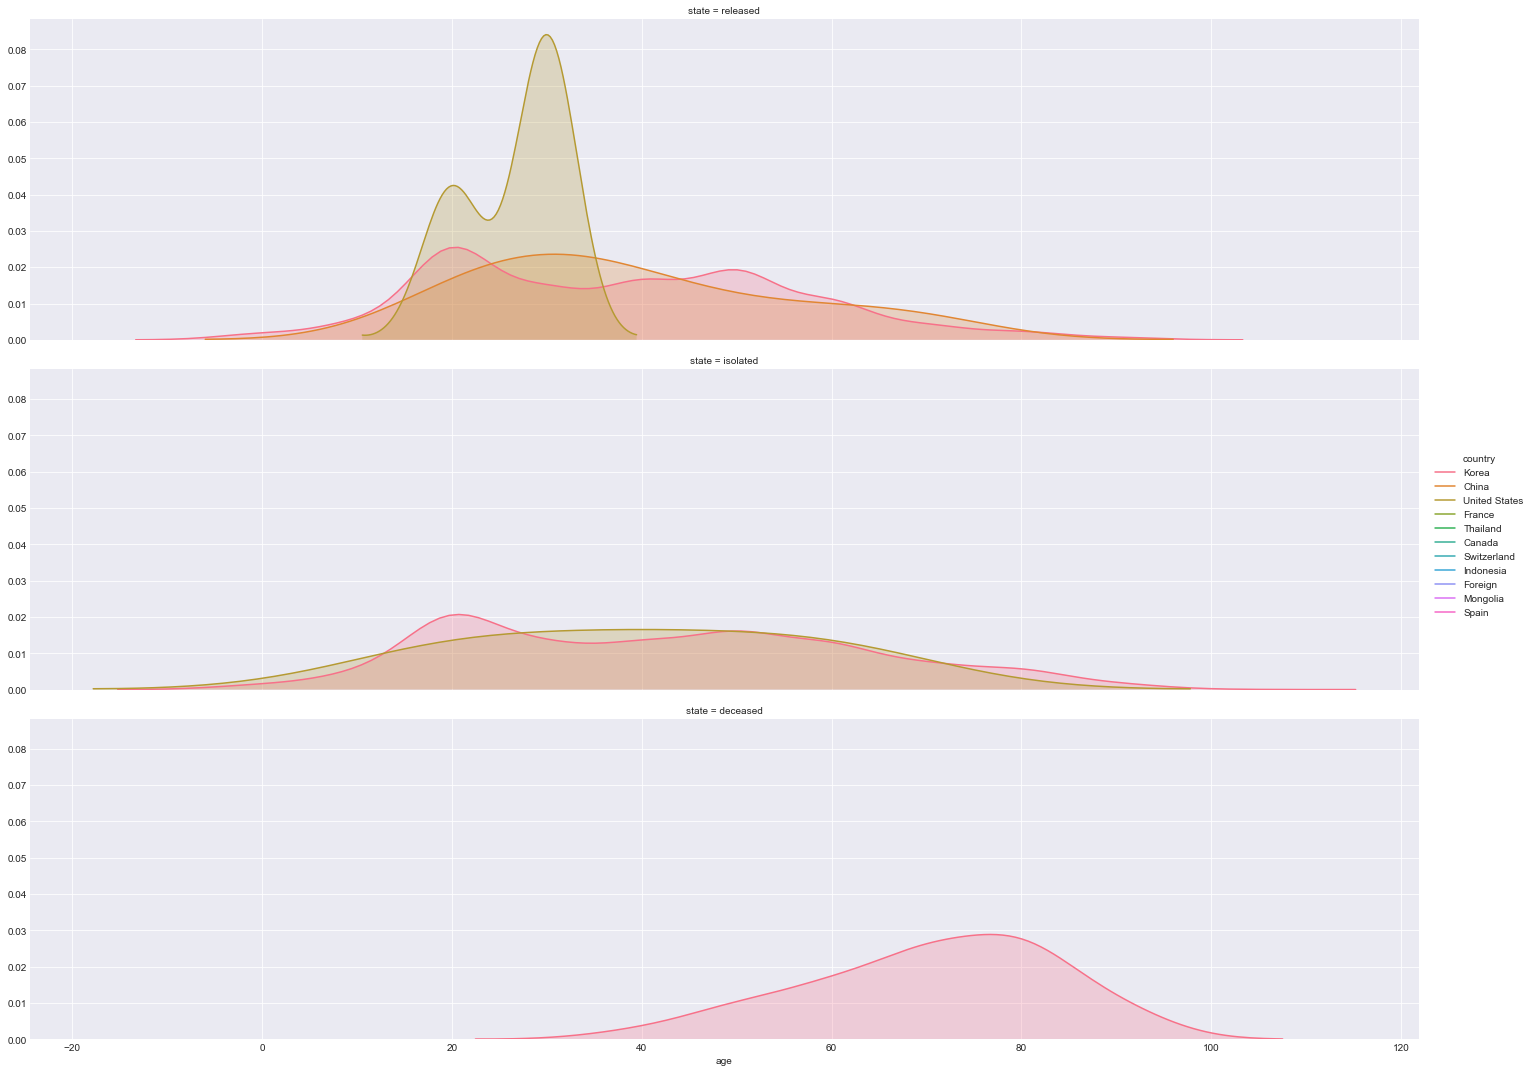

In [261]:
(sns
.FacetGrid(data = df ,
          hue = "country",
          row = "state",
          height = 5,
          aspect = 4
          )
.map(sns.kdeplot ,"age" ,shade = True )
.add_legend()

);

- ülkelere göre , state(izole ,dead ,recoved ) durumlarını yaş dağılımınca veren güzel bir grafik 

<a id=23 ></a>
# Machine Learning 

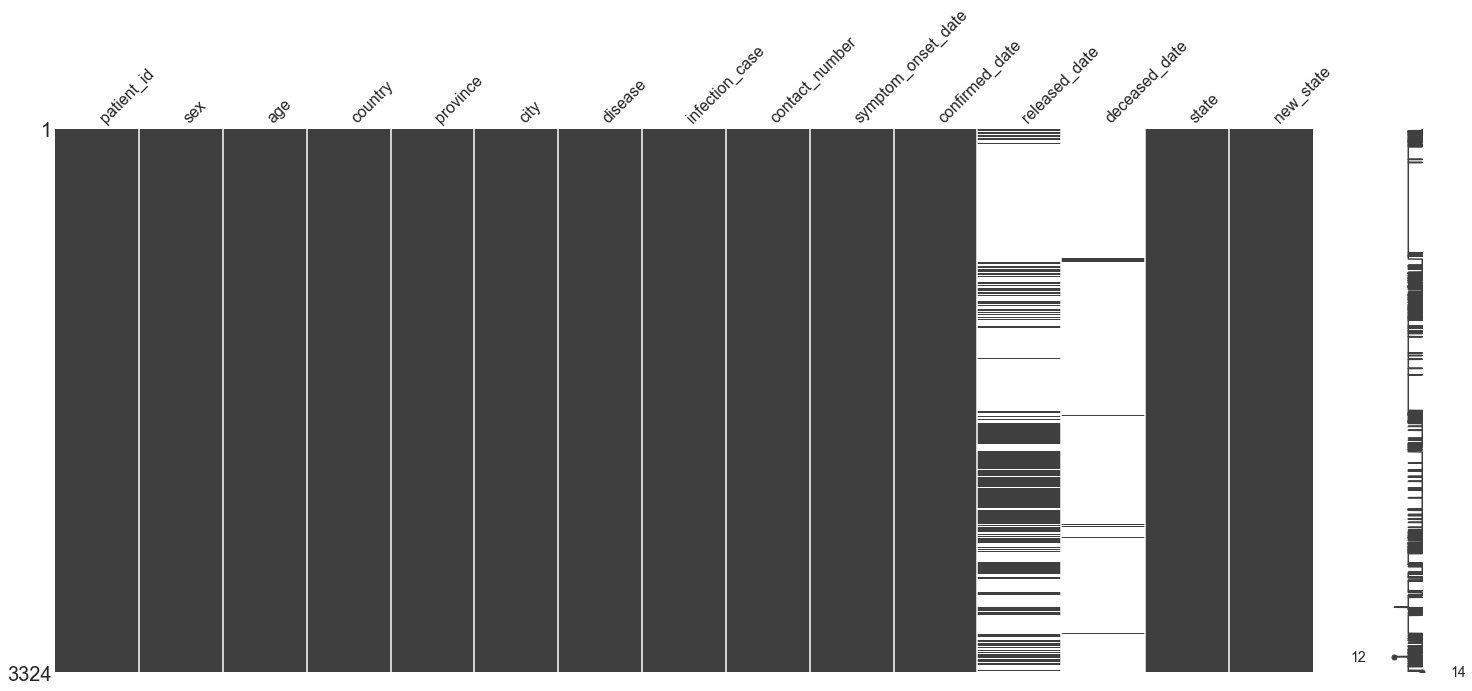

In [263]:
msno.matrix(df);

# Kategorik değişkeni Modellemeye Hazır Hale getirmek 

In [267]:
df = pd.get_dummies( df , columns = ["sex"]) 

In [270]:
df.drop("sex_female" ,inplace = True,axis = 1)

In [273]:
df

,patient_id,age,country,province,city,disease,infection_case,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,new_state,sex_male
0,1000000001,50.0,Korea,Seoul,Gangseo-gu,0,overseas inflow,76.0,2020-01-22,2020-01-23,2020-02-05,NaN,released,0,1
1,1000000002,30.0,Korea,Seoul,Jungnang-gu,0,overseas inflow,32.0,2020-01-30,2020-01-30,2020-03-02,NaN,released,0,1
2,1000000003,50.0,Korea,Seoul,Jongno-gu,0,contact with patient,18.0,2020-01-30,2020-01-30,2020-02-19,NaN,released,0,1
3,1000000004,20.0,Korea,Seoul,Mapo-gu,0,overseas inflow,10.0,2020-01-26,2020-01-30,2020-02-15,NaN,released,0,1
4,1000000005,20.0,Korea,Seoul,Seongbuk-gu,0,contact with patient,3.0,2020-01-31,2020-01-31,2020-02-24,NaN,released,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3321,7000000009,20.0,Korea,Jeju-do,Jeju-do,0,overseas inflow,15.0,2020-03-29,2020-03-29,NaN,NaN,isolated,1,0
3322,7000000010,20.0,Korea,Jeju-do,Jeju-do,0,overseas inflow,19.0,2020-04-03,2020-04-03,NaN,NaN,isolated,1,0
3323,7000000011,30.0,Korea,Jeju-do,Jeju-do,0,contact with patient,6.0,2020-04-03,2020-04-03,NaN,NaN,isolated,1,1
3324,7000000012,20.0,Korea,Jeju-do,Jeju-do,0,overseas inflow,10.0,2020-04-03,2020-04-03,NaN,NaN,isolated,1,0


In [280]:
df.new_state.value_counts()

0    1637
1    1620
2      67
Name: new_state, dtype: int64

In [ ]:
df

In [293]:
df.disease.value_counts()

0    3306
1      18
Name: disease, dtype: int64

In [294]:
mdf = df[["age","sex_male" , "new_state" , "disease"]]

In [295]:
mdf.isnull().sum()

age          4
sex_male     0
new_state    0
disease      0
dtype: int64

In [308]:
mdf.age.dropna(inplace = True)

In [309]:
mdf.age = mdf.age.astype("int64")

In [333]:
mdf [mdf.age.isnull()]

,age,sex_male,new_state,disease
2926,NaN,0,0,0
2927,NaN,1,0,0
3228,NaN,1,1,0
3229,NaN,1,1,0


In [334]:
mdf = mdf.drop( labels = [2926  ,2927 , 3228 ,3229] )

In [335]:
mdf.age.astype( "int64" )

0       50
1       30
2       50
3       20
4       20
        ..
3321    20
3322    20
3323    30
3324    20
3325    10
Name: age, Length: 3320, dtype: int64

# Bagimli ve bağımsız değişken ayrışımı 

In [336]:
X = mdf.drop("disease" , axis = 1)

In [337]:
y = mdf["disease"]

# Veri Setini Test Train Olarak İykiye Ayırma

In [338]:
from sklearn.model_selection import train_test_split

X_train , X_test ,y_train  , y_test = train_test_split( X ,y ,test_size = 0.20  )

In [339]:
print( X_train.shape)
print( X_test.shape)
print( y_train.shape )
print( y_test.shape )

(2656, 3)
(664, 3)
(2656,)
(664,)


# Model Kurma (Random Forest)

In [340]:
from sklearn.metrics import mean_squared_error

In [341]:
from sklearn.ensemble import RandomForestRegressor

In [342]:
rf_model = RandomForestRegressor( random_state = 24 )

In [343]:
rf_model.fit( X_train ,y_train )

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=24, verbose=0, warm_start=False)

In [344]:
y_pred = rf_model.predict(X_test)

In [345]:
np.sqrt( mean_squared_error(y_test ,y_pred) )

0.0589363748086092

# Model Tuning

In [349]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [350]:
rf = RandomForestRegressor(random_state  = 24)
rf_params = {
    "n_estimators" :[100 ,500 ,1000],
    "max_depth" : list(range(1 ,10))}

In [351]:
rf_cv = GridSearchCV( rf,
                    rf_params ,
                    cv  =10 ,
                    n_jobs = -1,
                    verbose = 2).fit( X_train ,y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   27.3s finished


In [353]:
rf_cv.best_params_

{'max_depth': 2, 'n_estimators': 100}

# Final Modeli

In [354]:
rf_tuned = RandomForestRegressor( max_depth = 2,
                                n_estimators = 100).fit(X_train ,y_train)

In [355]:
y_pred = rf_tuned.predict( X_test )

In [359]:
np.sqrt( mean_squared_error( y_test ,y_pred) )

0.05382993133321114

In [360]:
rf_tuned.feature_importances_

array([0.3187606 , 0.00485976, 0.67637964])

In [361]:
Importance = pd.DataFrame({"Importance" : rf_tuned.feature_importances_*100} ,
                         index = X_train.columns)

### Değişkelerin Tahmindeki Önemlilik Düzeyi

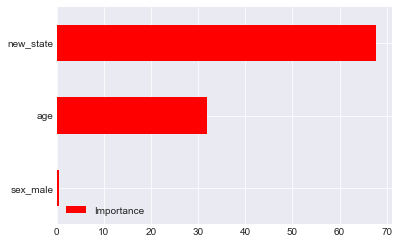

In [362]:
Importance.sort_values(by = "Importance" ,
                        axis = 0,
                      ascending= True).plot(kind = "barh" ,color = "red");